### Тема: предсказание итоговой стоимости (Revised Cost)

In [3]:
import yaml
cfg = None
with open('../config.yaml', 'r') as config:
    cfg = yaml.safe_load(config)

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import json

In [4]:
df = pd.read_csv(cfg["dataset_1"])

/tmp/ipykernel_92822/2154587262.py:1: DtypeWarning: Columns (22,32) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(cfg["dataset_1"])


In [5]:
df.head(20)

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,...,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
0,201505065519,4,sign - erect,05/06/2015,0326,023,140,NaN,Ellis,St,...,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.785719256680785, -122.40852313194863)",1380611233945
1,201604195146,4,sign - erect,04/19/2016,0306,007,440,NaN,Geary,St,...,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.78733980600732, -122.41063199757738)",1420164406718
2,201605278609,3,additions alterations or repairs,05/27/2016,0595,203,1647,NaN,Pacific,Av,...,1.0,constr type 1,1.0,constr type 1,NaN,3.0,Russian Hill,94109.0,"(37.7946573324287, -122.42232562979227)",1424856504716
3,201611072166,8,otc alterations permit,11/07/2016,0156,011,1230,NaN,Pacific,Av,...,5.0,wood frame (5),5.0,wood frame (5),NaN,3.0,Nob Hill,94109.0,"(37.79595867909168, -122.41557405519474)",1443574295566
4,201611283529,6,demolitions,11/28/2016,0342,001,950,NaN,Market,St,...,3.0,constr type 3,NaN,NaN,NaN,6.0,Tenderloin,94102.0,"(37.78315261897309, -122.40950883997789)",144548169992
5,201706149344,8,otc alterations permit,06/14/2017,4105,009,800,NaN,Indiana,St,...,1.0,constr type 1,1.0,constr type 1,NaN,10.0,Potrero Hill,94107.0,"(37.75922331346539, -122.39170402628598)",1466911170855
6,201706300814,8,otc alterations permit,06/30/2017,1739,020,1291,NaN,11th,Av,...,5.0,wood frame (5),5.0,wood frame (5),NaN,5.0,Inner Sunset,94122.0,"(37.764145640138565, -122.46875112470363)",1468970403692
7,M803667,8,otc alterations permit,06/30/2017,4789,014,1465,NaN,Revere,Av,...,NaN,NaN,NaN,NaN,NaN,10.0,Bayview Hunters Point,94124.0,"(37.73005099023611, -122.38784938916618)",1469035175050
8,M804227,8,otc alterations permit,07/05/2017,1212,054,2094,NaN,Fell,St,...,NaN,NaN,NaN,NaN,NaN,5.0,Lone Mountain/USF,94117.0,"(37.772393498502595, -122.45231466824669)",1469198253772
9,M804767,8,otc alterations permit,07/06/2017,1259,016,89,NaN,Alpine,Tr,...,NaN,NaN,NaN,NaN,NaN,8.0,Haight Ashbury,94117.0,"(37.7691724293766, -122.43734859051908)",146932394171


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198900 entries, 0 to 198899
Data columns (total 43 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   Permit Number                           198900 non-null  object 
 1   Permit Type                             198900 non-null  int64  
 2   Permit Type Definition                  198900 non-null  object 
 3   Permit Creation Date                    198900 non-null  object 
 4   Block                                   198900 non-null  object 
 5   Lot                                     198900 non-null  object 
 6   Street Number                           198900 non-null  int64  
 7   Street Number Suffix                    2216 non-null    object 
 8   Street Name                             198900 non-null  object 
 9   Street Suffix                           196132 non-null  object 
 10  Unit                                    2947

In [7]:
nan_df = (df.isnull().mean() * 100).reset_index()
nan_df.columns = ["column_name", "percentage"]
nan_df.sort_values("percentage", ascending=False, inplace=True)
nan_df.head(43)

,column_name,percentage
32,TIDF Compliance,99.998994
22,Voluntary Soft-Story Retrofit,99.982403
11,Unit Suffix,99.014077
7,Street Number Suffix,98.885872
37,Site Permit,97.305681
19,Structural Notification,96.519859
23,Fire Only Permit,90.534439
10,Unit,85.178984
17,Completed Date,51.135747
24,Permit Expiration Date,26.083459


**Выводы:**
 1. Количество столбцов с TIDF Compilance != NaN 2 и они принимают разные значения => это признак не поможет в обучении модели
 2. Voluntary Soft-Story Retrofit принимает в столбцах где не NaN значения Y, что значит True. NaN можно заменить на False и привести тип к булевому
 4. Street Suffix и Stree Number Suffix можно объеденить вместе
 5. Site Permit - наличие разрешения, принимает только одно значения Y, значит остальные можно заполнить N и привести к булевому типу. Аналогично с Structural Notification, Fire Only Permit
 6. Supervisor District - некоторые округа существуют без надзорщиков, поэтому будет считать, что если он не указан, то его нет и заменим NaN на 0
 7. Недостающие Zipcode и Neighborhoods - Analysis Boundaries определим при помощи location, которую разобьем на 2 признака: широту и долготу. Если она отсутствует - удаляем строку
 9. Будем считать, что Estimated Cost с NaN означает, что пока не определено, какой бюджет предполагается, значит следует установить 0
 10. Permit Number и Record ID не дают никакой полезной информации, поэтому его можно удалить

In [8]:
def corrplot(d: pd.DataFrame) -> None:
  corr = d.corr()
  mask = np.triu(np.ones_like(corr, dtype=bool))
  figsize = (min(d.shape[1], 11), min(d.shape[1], 9))
  f, ax = plt.subplots(figsize=figsize)
  cmap = sns.diverging_palette(230, 20, as_cmap=True)
  sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
              square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

### Заполнение отсутствующих значений

In [ ]:
def full_nan_attributes(X): # 'Supervisor District','Estimated Cost'
    X = X.fillna(0)

In [10]:
for column in ['Site Permit', 'Voluntary Soft-Story Retrofit', 'Structural Notification', 'Fire Only Permit']:
    df[column] = df[column].fillna("N")
    df[column] = df[column].replace({"Y": 1, "N": 0})

/tmp/ipykernel_92822/2223798645.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[column] = df[column].replace({"Y": 1, "N": 0})


In [11]:
df['Street Suffix'] = df.apply(lambda row: f"{row['Street Suffix']}, {row['Street Number Suffix']}" if pd.notna(row['Street Number Suffix']) else row['Street Suffix'], axis=1)
df = df.drop(columns=['Street Number Suffix'])
df['Street Suffix'] = df['Street Suffix'].fillna("Not")

In [12]:
df = df.dropna(subset=['Location'])

df[['latitude', 'longitude']] = df['Location'].str.strip('()').str.split(',', expand=True)

df['latitude'] = df['latitude'].astype(float)
df['longitude'] = df['longitude'].astype(float)

In [13]:
drop_columns = ['Permit Number', 'Description', 'TIDF Compliance', 'Record ID']
df = df.drop(columns=drop_columns)

In [14]:
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
import time
from geopy.exc import GeocoderTimedOut


geolocator = Nominatim(user_agent="Arnoochka")
reverse = RateLimiter(geolocator.reverse, min_delay_seconds=1)

def get_location_info(row, max_retries=3, delay_seconds=1):
    latitude = row['latitude']
    longitude = row['longitude']
    
    retries = 0
    while retries < max_retries:
        try:
            location = reverse((latitude, longitude), exactly_one=True)
            address = location.raw['address']
            
            neighborhood = address.get('neighbourhood', None)
            postcode = address.get('postcode', None)
            
            return [neighborhood, postcode]
        
        except GeocoderTimedOut:
            retries += 1
            if retries < max_retries:
                time.sleep(delay_seconds)
            else:
                print(f"Timed out after {max_retries} attempts for coordinates ({latitude}, {longitude})")
                return [None, None]
        except Exception as e:
            print(f"Error occurred: {e} for coordinates ({latitude}, {longitude})")
            return [None, None]

for i in df.index:
    row = df.loc[i]
    if pd.isna(row['Neighborhoods - Analysis Boundaries']) or pd.isna(row['Zipcode']):
        neighborhood, zipcode = get_location_info(row)
        
        if pd.isna(row['Neighborhoods - Analysis Boundaries']): 
            df.loc[i]['Neighborhoods - Analysis Boundaries'] = neighborhood
            
        if pd.isna(row['Zipcode']):
           df.loc[i]['Zipcode'] = zipcode


df = df.dropna(subset=['Neighborhoods - Analysis Boundaries', 'Zipcode'])

/tmp/ipykernel_92822/3522845900.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[i]['Neighborhoods - Analysis Boundaries'] = neighborhood
/tmp/ipykernel_92822/3522845900.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[i]['Zipcode'] = zipcode


### Работа с датой

**Идея:** Попытаться заменить дату на относительное количество дней

In [15]:
df = pd.read_csv(cfg["dataset_1"])

/tmp/ipykernel_92822/2154587262.py:1: DtypeWarning: Columns (22,32) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(cfg["dataset_1"])


**Количества дней отноительно нечальной даты сборв данных: 01/01/2013**

In [16]:
date_columns = ['Permit Creation Date', 'Current Status Date', 'Filed Date', 'Issued Date', 'Completed Date', 'First Construction Document Date', 'Permit Expiration Date']

date_df = df[date_columns]

for column in date_columns:
    date_df[column] = pd.to_datetime(date_df[column], format='mixed').dt.round("s")
    
start_date = pd.to_datetime(
    pd.DataFrame(["01/01/2013"] * date_df.shape[0], index=date_df.index)[0],
        format='mixed'
)

for column in date_columns:
    date_df[f"delta_{column}"] = (date_df[column] - start_date).dt.days
    
delta_date_columns = [f"delta_{column}" for column in date_columns]

/tmp/ipykernel_92822/3448332561.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  date_df[column] = pd.to_datetime(date_df[column], format='mixed').dt.round("s")
/tmp/ipykernel_92822/3448332561.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  date_df[column] = pd.to_datetime(date_df[column], format='mixed').dt.round("s")
/tmp/ipykernel_92822/3448332561.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

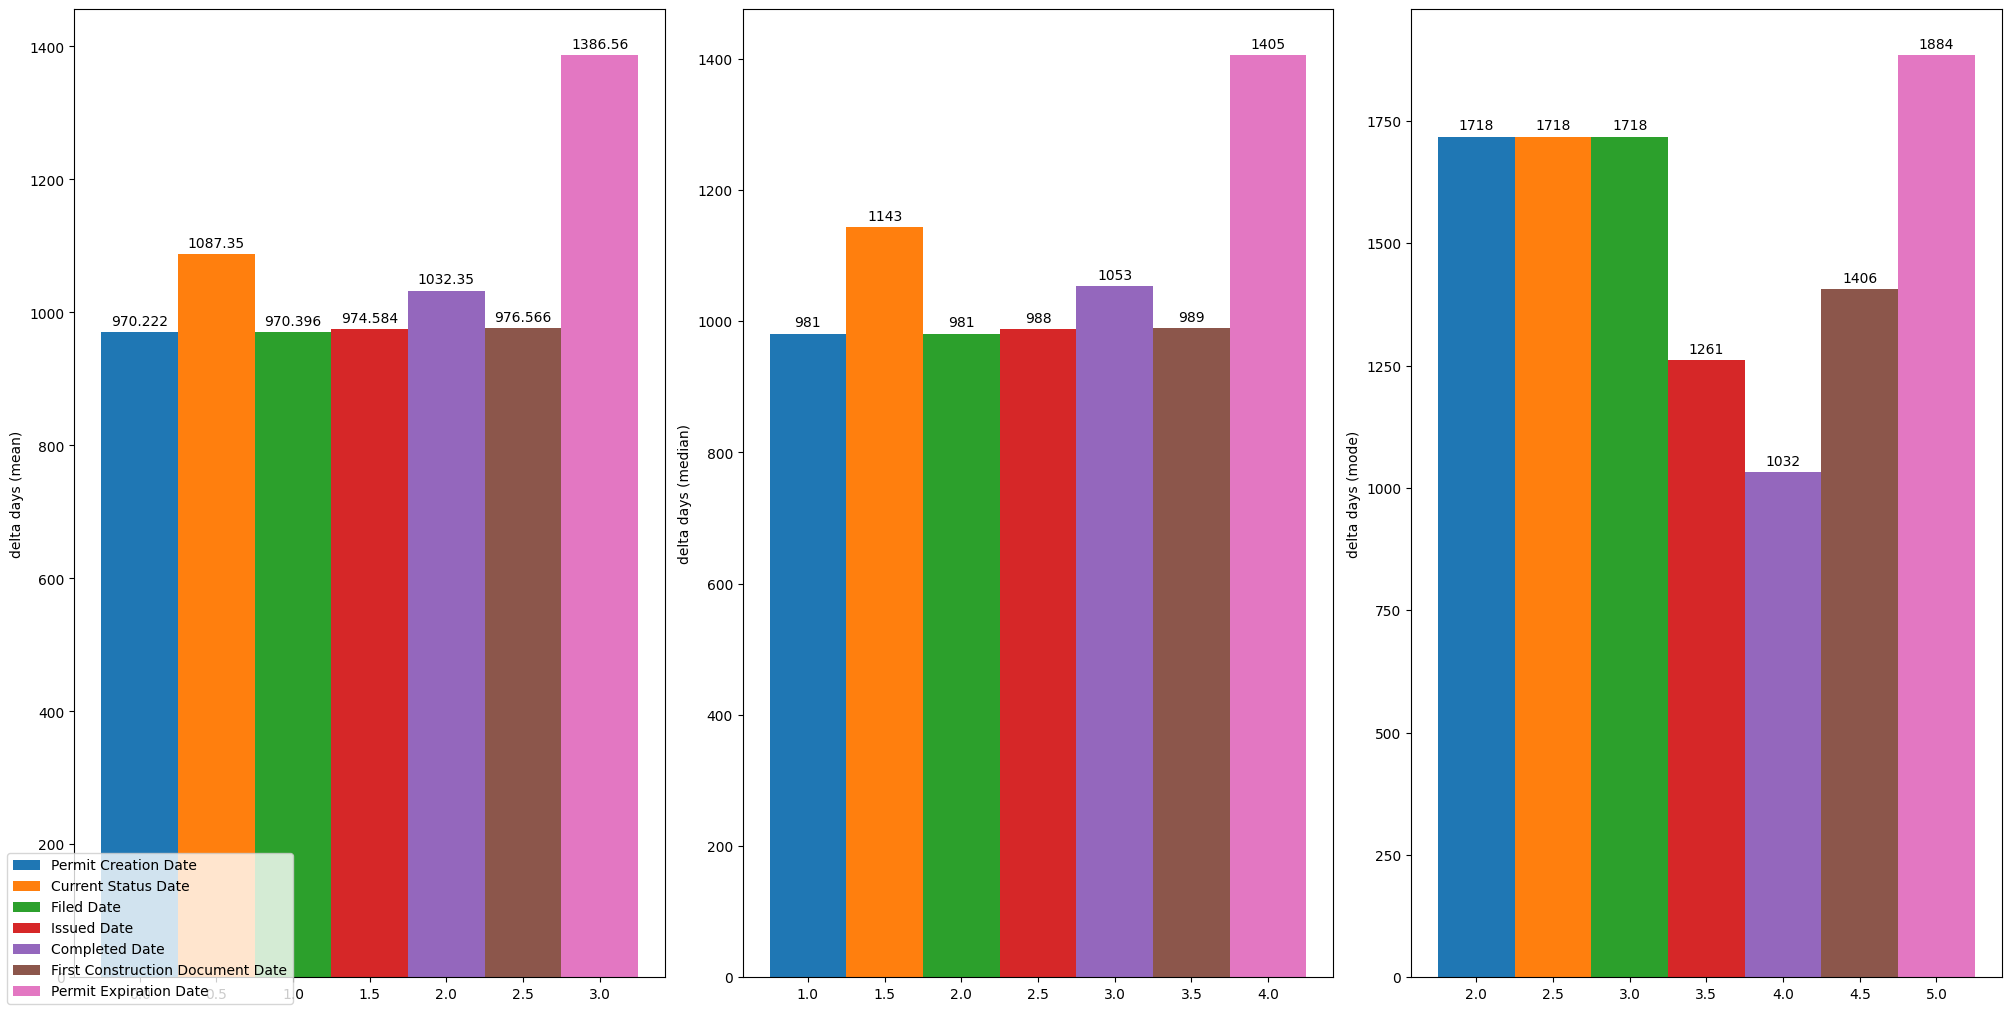

In [17]:
value_types = ("mean", "median", "mode")
value_times = dict.fromkeys(date_columns, None)
for attribute in date_columns:
    value_times[attribute] = (date_df[f"delta_{attribute}"].mean(),
                              date_df[f"delta_{attribute}"].median(),
                              date_df[f"delta_{attribute}"].mode()
                              )

x = np.arange(len(value_types))
width = 0.5
multiplier = 0
fig, ax = plt.subplots(ncols=3, layout='constrained', figsize=(20, 10))
for attribute, measurement in value_times.items():
    offset = width * multiplier
    
    for idx, value_type in enumerate(value_types):
        value = measurement[idx] 
    
        rects = ax[idx].bar(x[idx] + offset, value, width)
        ax[idx].bar_label(rects, padding=3)

    multiplier += 1
for idx, value_type in enumerate(value_types): 
    ax[idx].set_ylabel(f"delta days ({value_type})")
    
fig.legend(date_columns, loc='lower left')
plt.show()

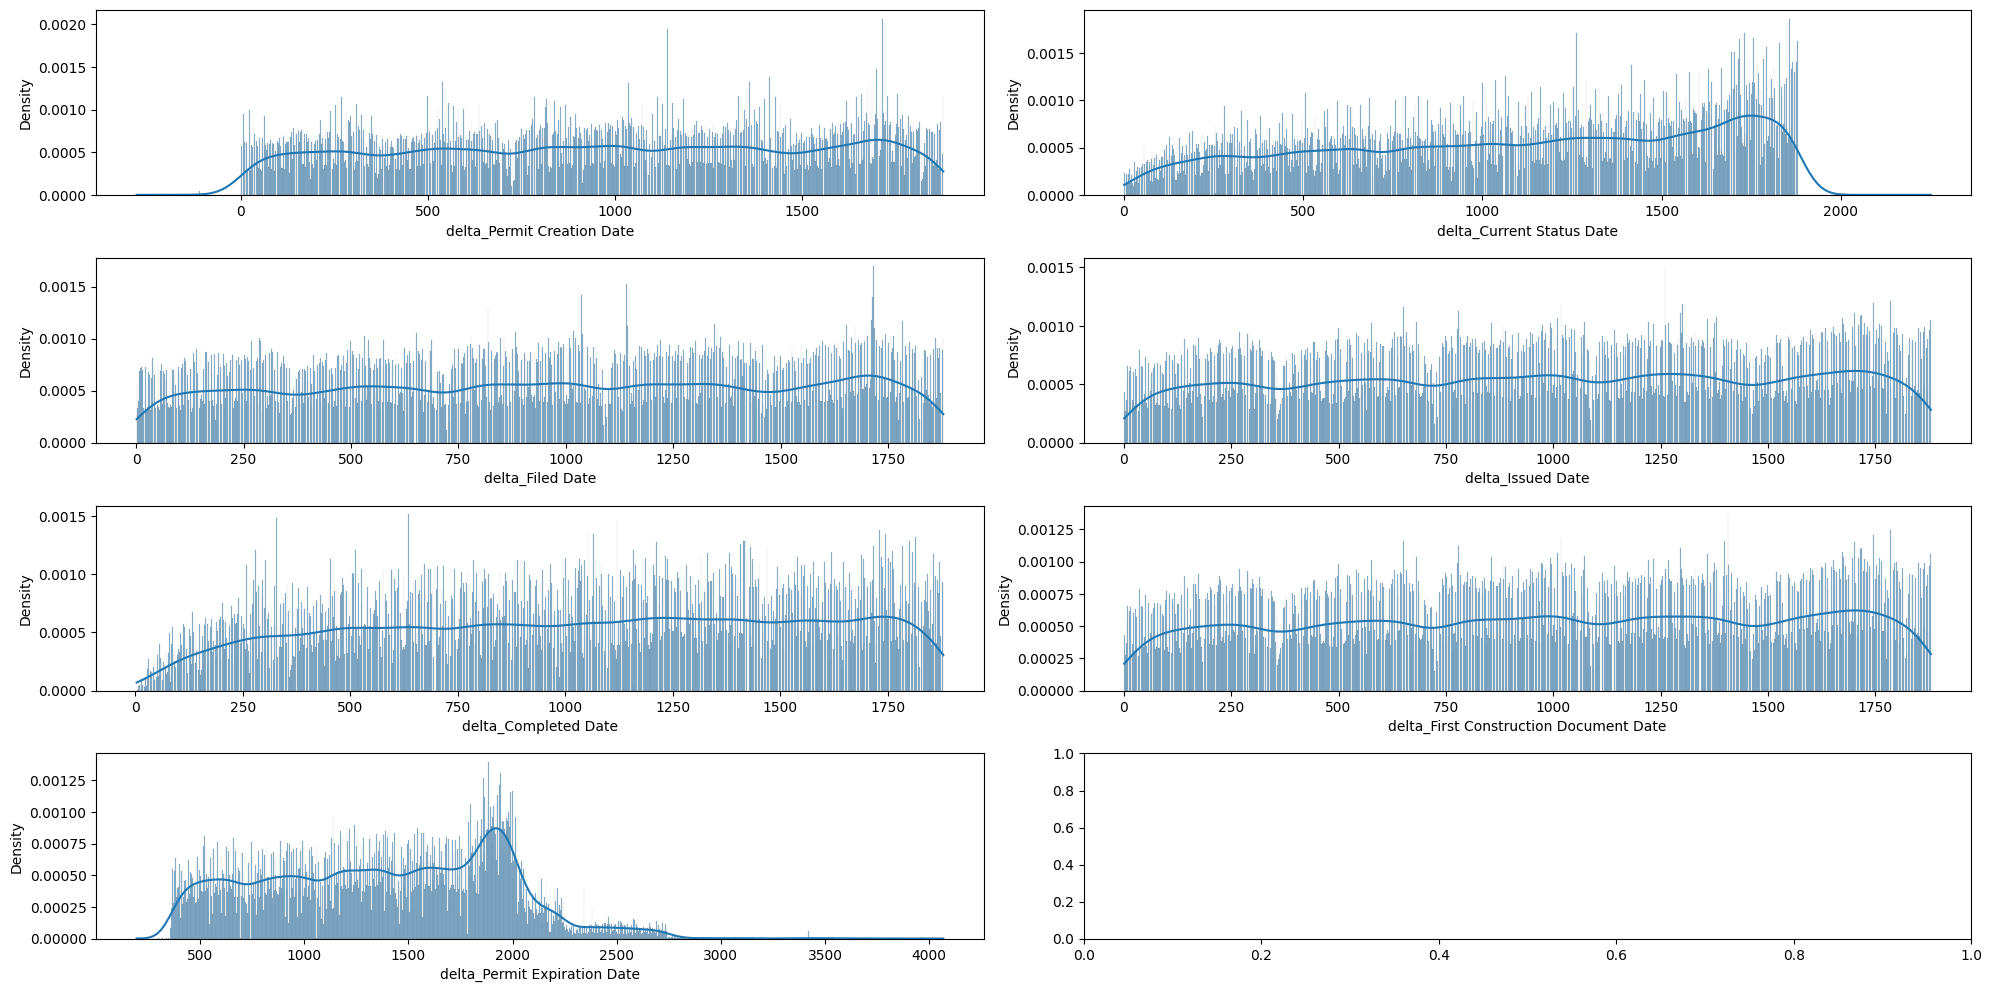

In [18]:
fig, axes = plt.subplots(4, 2, figsize=(20, 10))
axes_flattened = axes.reshape(-1)

bins = 1000

for idx, column in enumerate(delta_date_columns):
    ax = axes_flattened[idx]
    sns.histplot(data=date_df.dropna(subset=column),
                 x=column,
                 bins=bins,
                 stat='density',
                 kde=True,
                 ax=ax)
fig.tight_layout(pad=1.0)

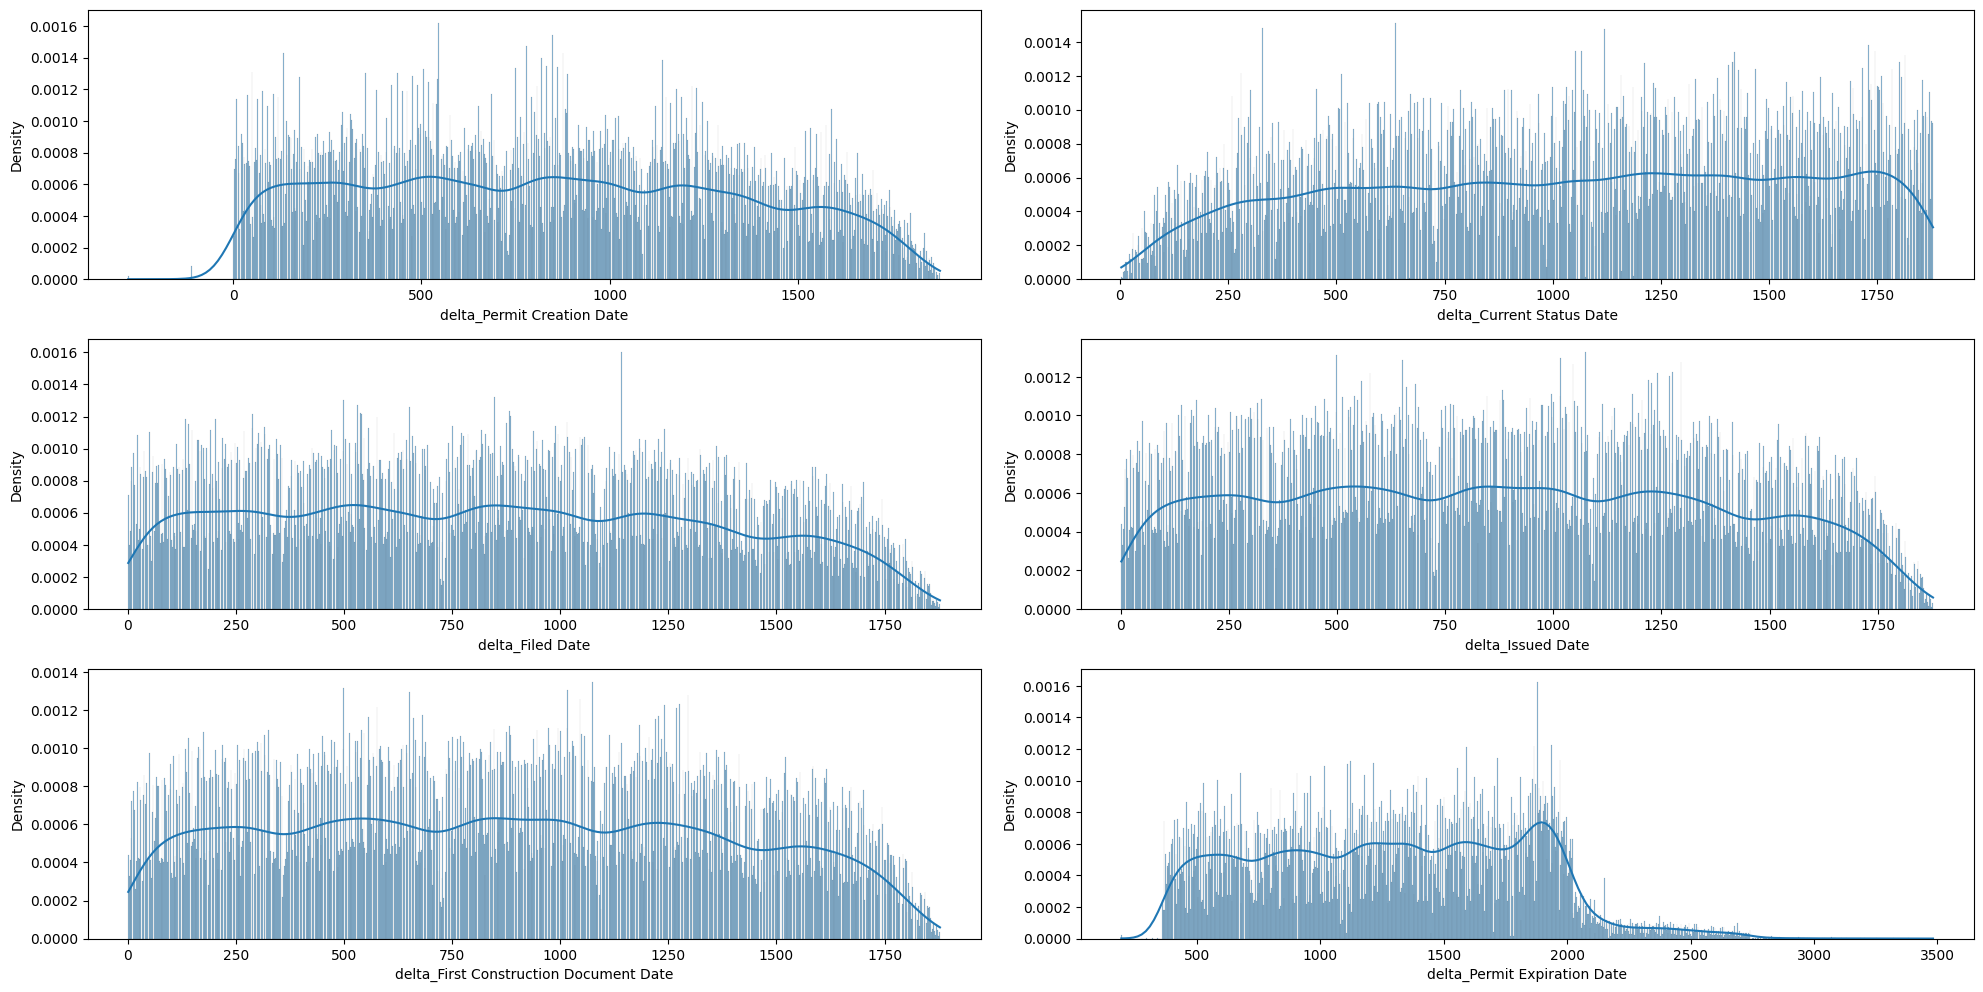

In [19]:
fig, axes = plt.subplots(3, 2, figsize=(20, 10))
axes_flattened = axes.reshape(-1)

bins = 1000

delta_date_columns_cd = delta_date_columns.copy()
delta_date_columns_cd.remove("delta_Completed Date")

for idx, column in enumerate(delta_date_columns_cd):
    ax = axes_flattened[idx]
    sns.histplot(data=date_df.dropna(subset="Completed Date"),
                 x=column,
                 bins=bins,
                 stat='density',
                 kde=True,
                 ax=ax)
fig.tight_layout(pad=1.0)

<Axes: >

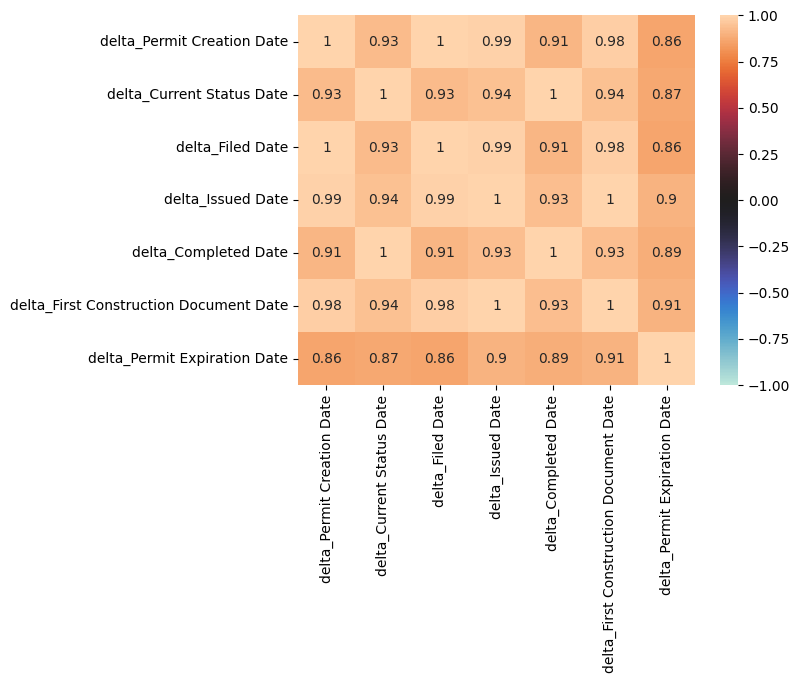

In [20]:
sns.heatmap(date_df[delta_date_columns].corr(), annot = True, vmin=-1, vmax=1, center= 0)

**Количества дней относиьельно `Permit Creation Date`**

In [21]:
date_columns = ['Current Status Date', 'Filed Date', 'Issued Date', 'Completed Date', 'First Construction Document Date', 'Permit Expiration Date']

date_df = df[date_columns]

for column in date_columns:
    date_df[column] = pd.to_datetime(date_df[column], format='mixed').dt.round("s")
    
start_date = pd.to_datetime(df['Permit Creation Date'], format='mixed')

for column in date_columns:
    date_df[f"delta_{column}"] = (date_df[column] - start_date).dt.days
    
delta_date_columns = [f"delta_{column}" for column in date_columns]


/tmp/ipykernel_92822/828498502.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  date_df[column] = pd.to_datetime(date_df[column], format='mixed').dt.round("s")
/tmp/ipykernel_92822/828498502.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  date_df[column] = pd.to_datetime(date_df[column], format='mixed').dt.round("s")
/tmp/ipykernel_92822/828498502.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



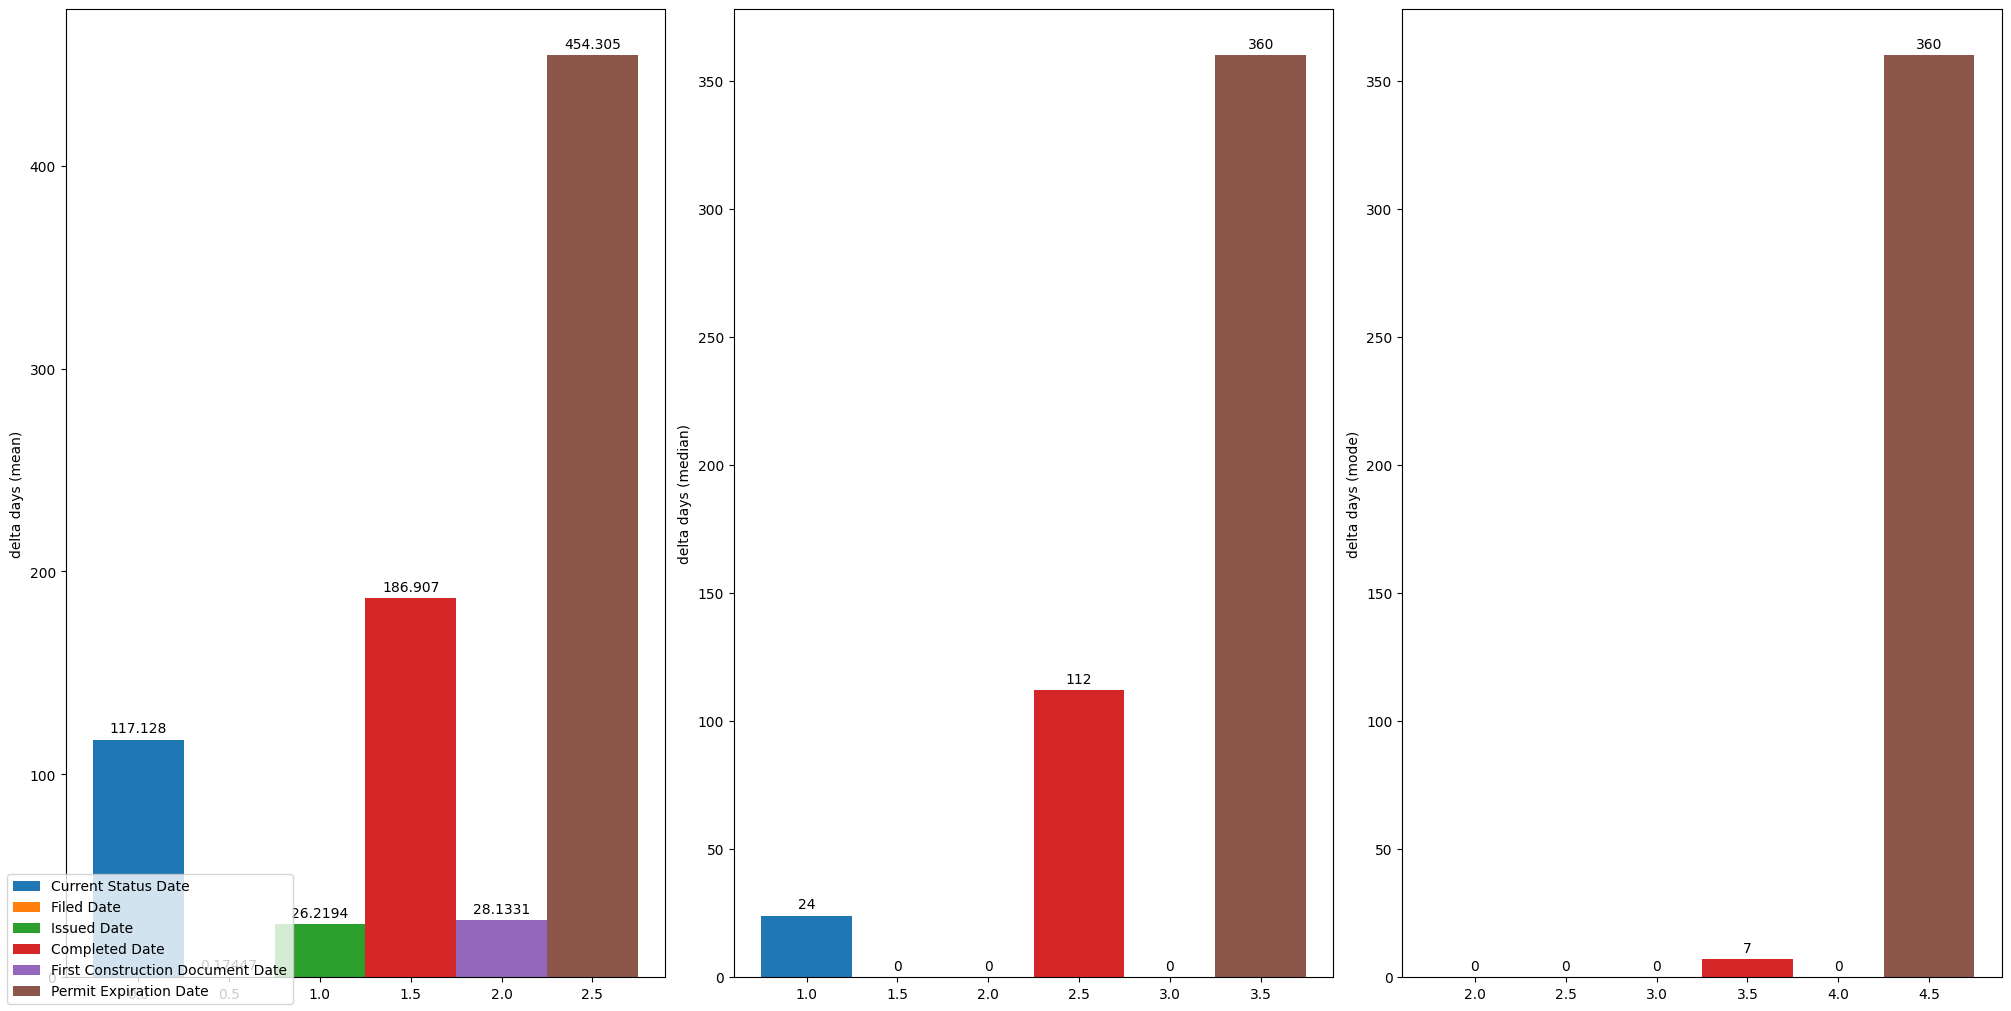

In [22]:
value_types = ("mean", "median", "mode")
value_times = dict.fromkeys(date_columns, None)
for attribute in date_columns:
    value_times[attribute] = (date_df[f"delta_{attribute}"].mean(),
                              date_df[f"delta_{attribute}"].median(),
                              date_df[f"delta_{attribute}"].mode()
                              )

x = np.arange(len(value_types))
width = 0.5
multiplier = 0
fig, ax = plt.subplots(ncols=3, layout='constrained', figsize=(20, 10))
for attribute, measurement in value_times.items():
    offset = width * multiplier
    
    for idx, value_type in enumerate(value_types):
        value = measurement[idx] 
    
        rects = ax[idx].bar(x[idx] + offset, value, width)
        ax[idx].bar_label(rects, padding=3)

    multiplier += 1
for idx, value_type in enumerate(value_types): 
    ax[idx].set_ylabel(f"delta days ({value_type})")
    
fig.legend(date_columns, loc='lower left')
plt.show()

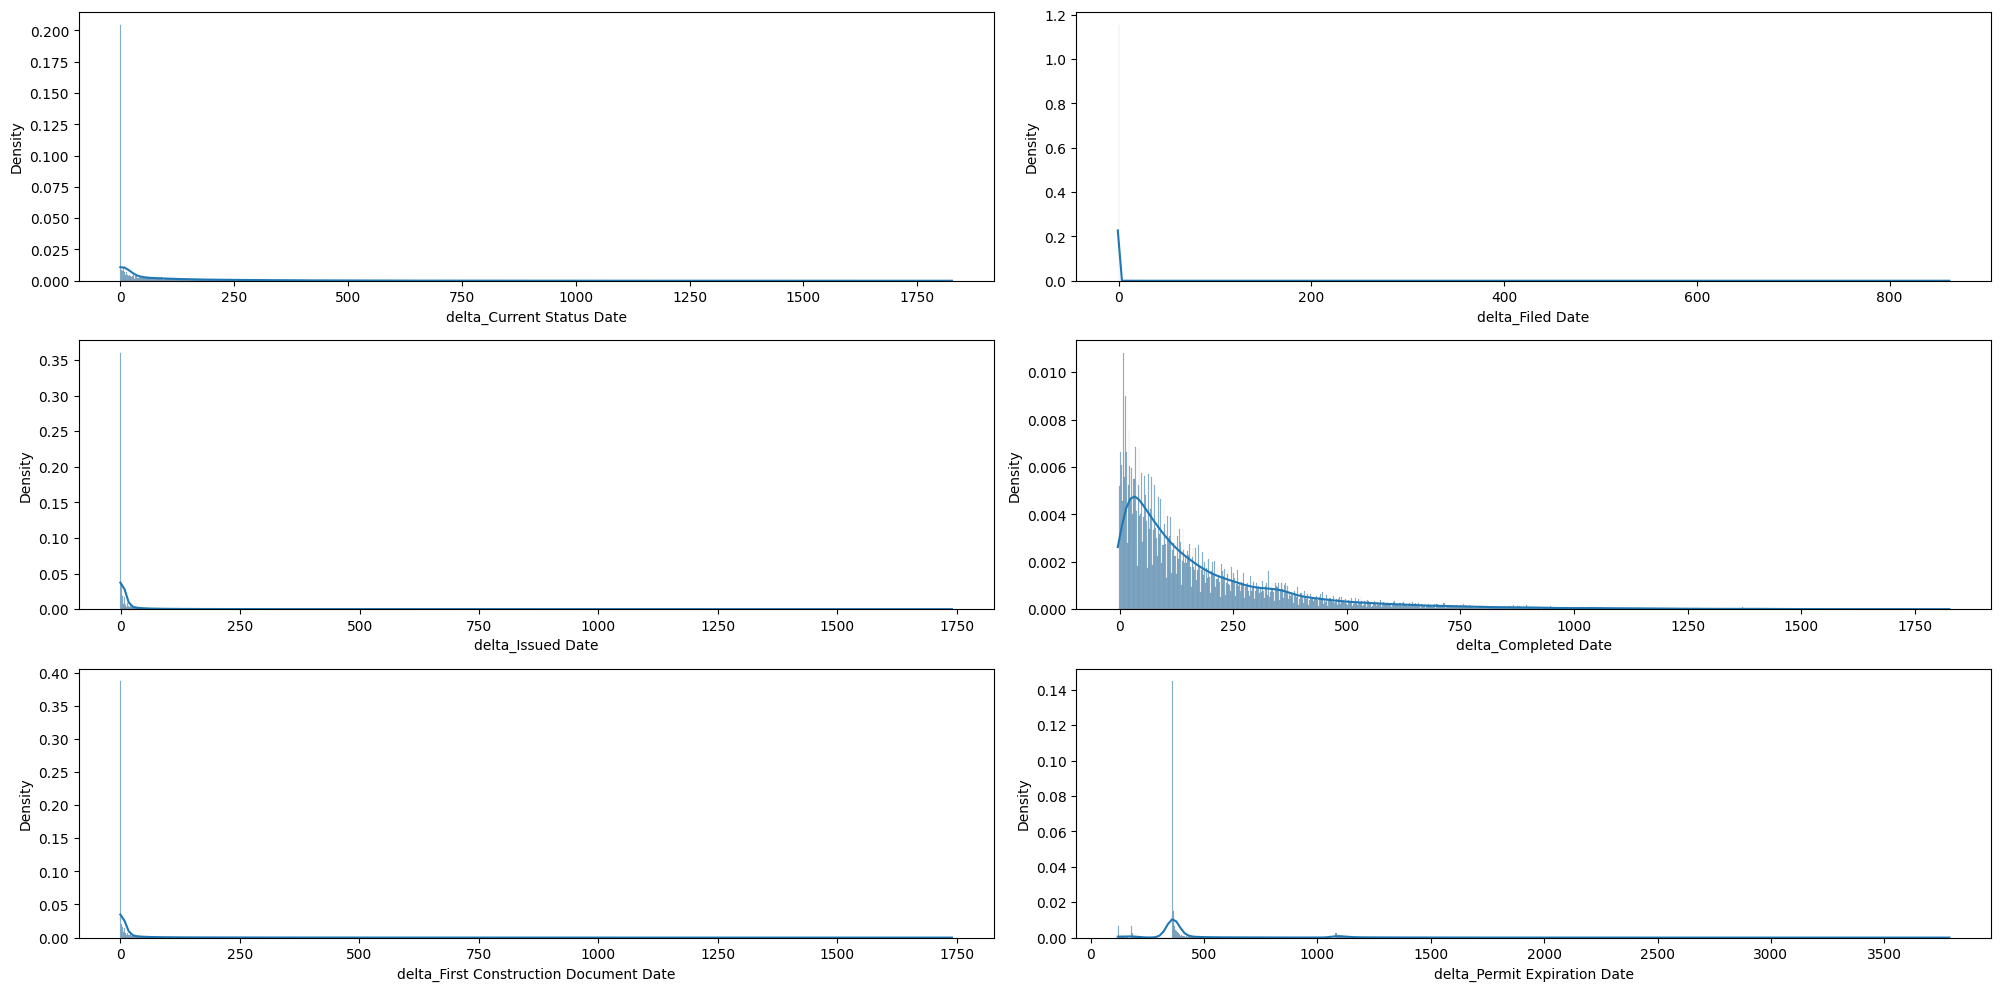

In [23]:
fig, axes = plt.subplots(3, 2, figsize=(20, 10))
axes_flattened = axes.reshape(-1)

bins = 1000

for idx, column in enumerate(delta_date_columns):
    ax = axes_flattened[idx]
    sns.histplot(data=date_df.dropna(subset=column),
                 x=column,
                 bins=bins,
                 stat='density',
                 kde=True,
                 ax=ax)
fig.tight_layout(pad=1.0)

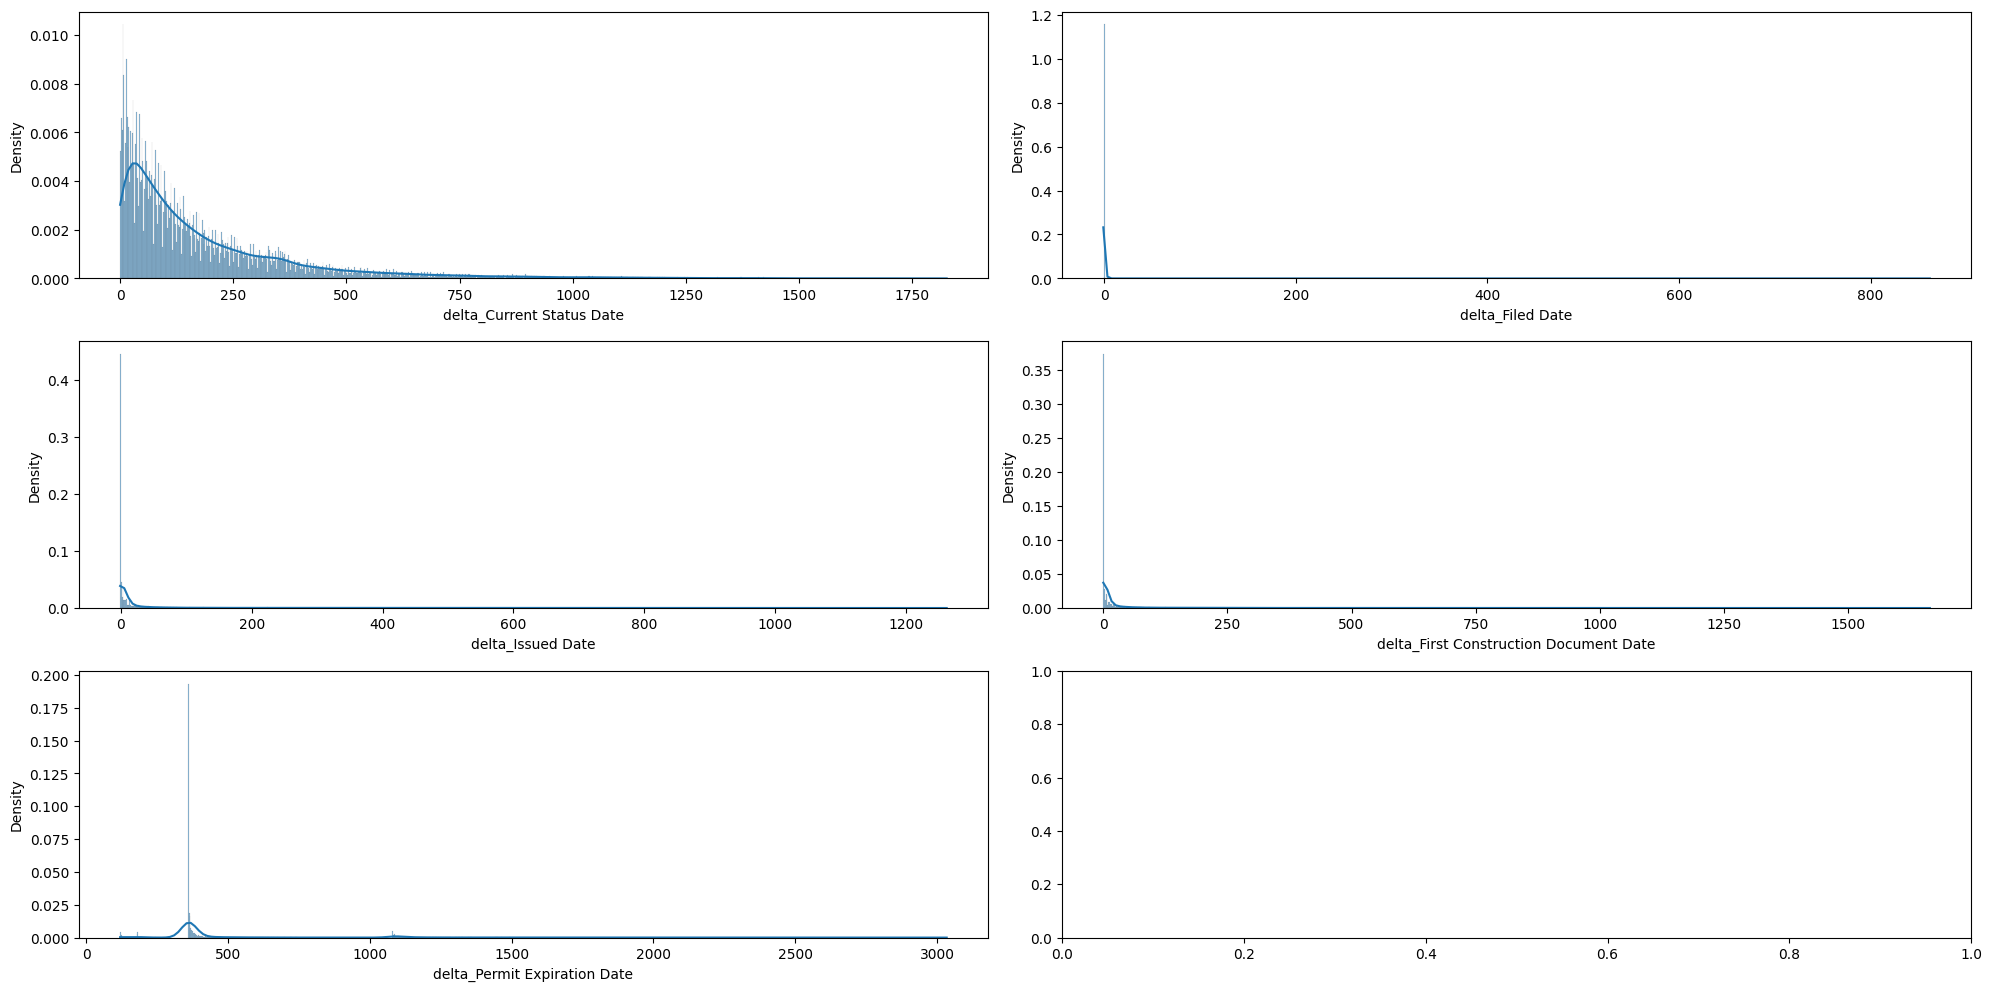

In [24]:
fig, axes = plt.subplots(3, 2, figsize=(20, 10))
axes_flattened = axes.reshape(-1)

bins = 1000

delta_date_columns_cd = delta_date_columns.copy()
delta_date_columns_cd.remove("delta_Completed Date")

for idx, column in enumerate(delta_date_columns_cd):
    ax = axes_flattened[idx]
    sns.histplot(data=date_df.dropna(subset="Completed Date"),
                 x=column,
                 bins=bins,
                 stat='density',
                 kde=True,
                 ax=ax)
fig.tight_layout(pad=1.0)

In [25]:
nan_df = (date_df.isnull().mean() * 100).reset_index()
nan_df.columns = ["column_name", "percentage"]
nan_df.sort_values("percentage", ascending=False, inplace=True)
nan_df.head(43)

,column_name,percentage
3,Completed Date,51.135747
9,delta_Completed Date,51.135747
5,Permit Expiration Date,26.083459
11,delta_Permit Expiration Date,26.083459
10,delta_First Construction Document Date,7.514329
4,First Construction Document Date,7.514329
2,Issued Date,7.511312
8,delta_Issued Date,7.511312
0,Current Status Date,0.000000
1,Filed Date,0.000000


**Выводы:**

**"Абсолютная" дельта**
 1. Математическое ожидания и медиана очень схожи
 2. При удалении строк, где `Completed Date` is NaN изменяется распределение данных.
 3. При замене медианой или средним отсутствующих значений может произойти так, что какое-то значение меньше `Permit Creation Date`, что в реальности невозможно
 4. Появляется сильная корреляция между данными

**"Относительная" дельта**
 1. Математичекое ожидание и медиана расходятся более значительно
 2. При удалении строк, где `Completed Date` is NaN **не** изменяется распределение данных.
 3. В атрибутах с отсутствующими значениями: `Permit Expiration Date`, `First Construction Document Date`, `Issued Date` сильно выражена медиана, значит, если ей заменять, то данные слабо исказятся 
 4. Отсутствует проблема "абсолютной" дельты, описанная в п.3
 5. Корелляция хоть и есть, но не такая сильная

**Будем использовать "относительную" дельту. Недостающие значения заполняются медианой (или модой, т.к. они равны)**

<Axes: >

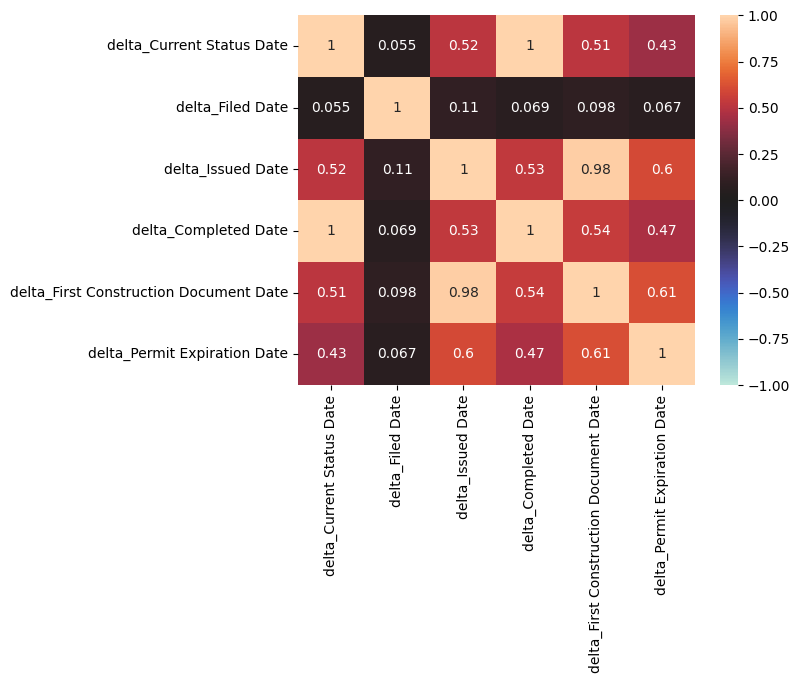

In [26]:
sns.heatmap(date_df[delta_date_columns].corr(), annot = True, vmin=-1, vmax=1, center=0)

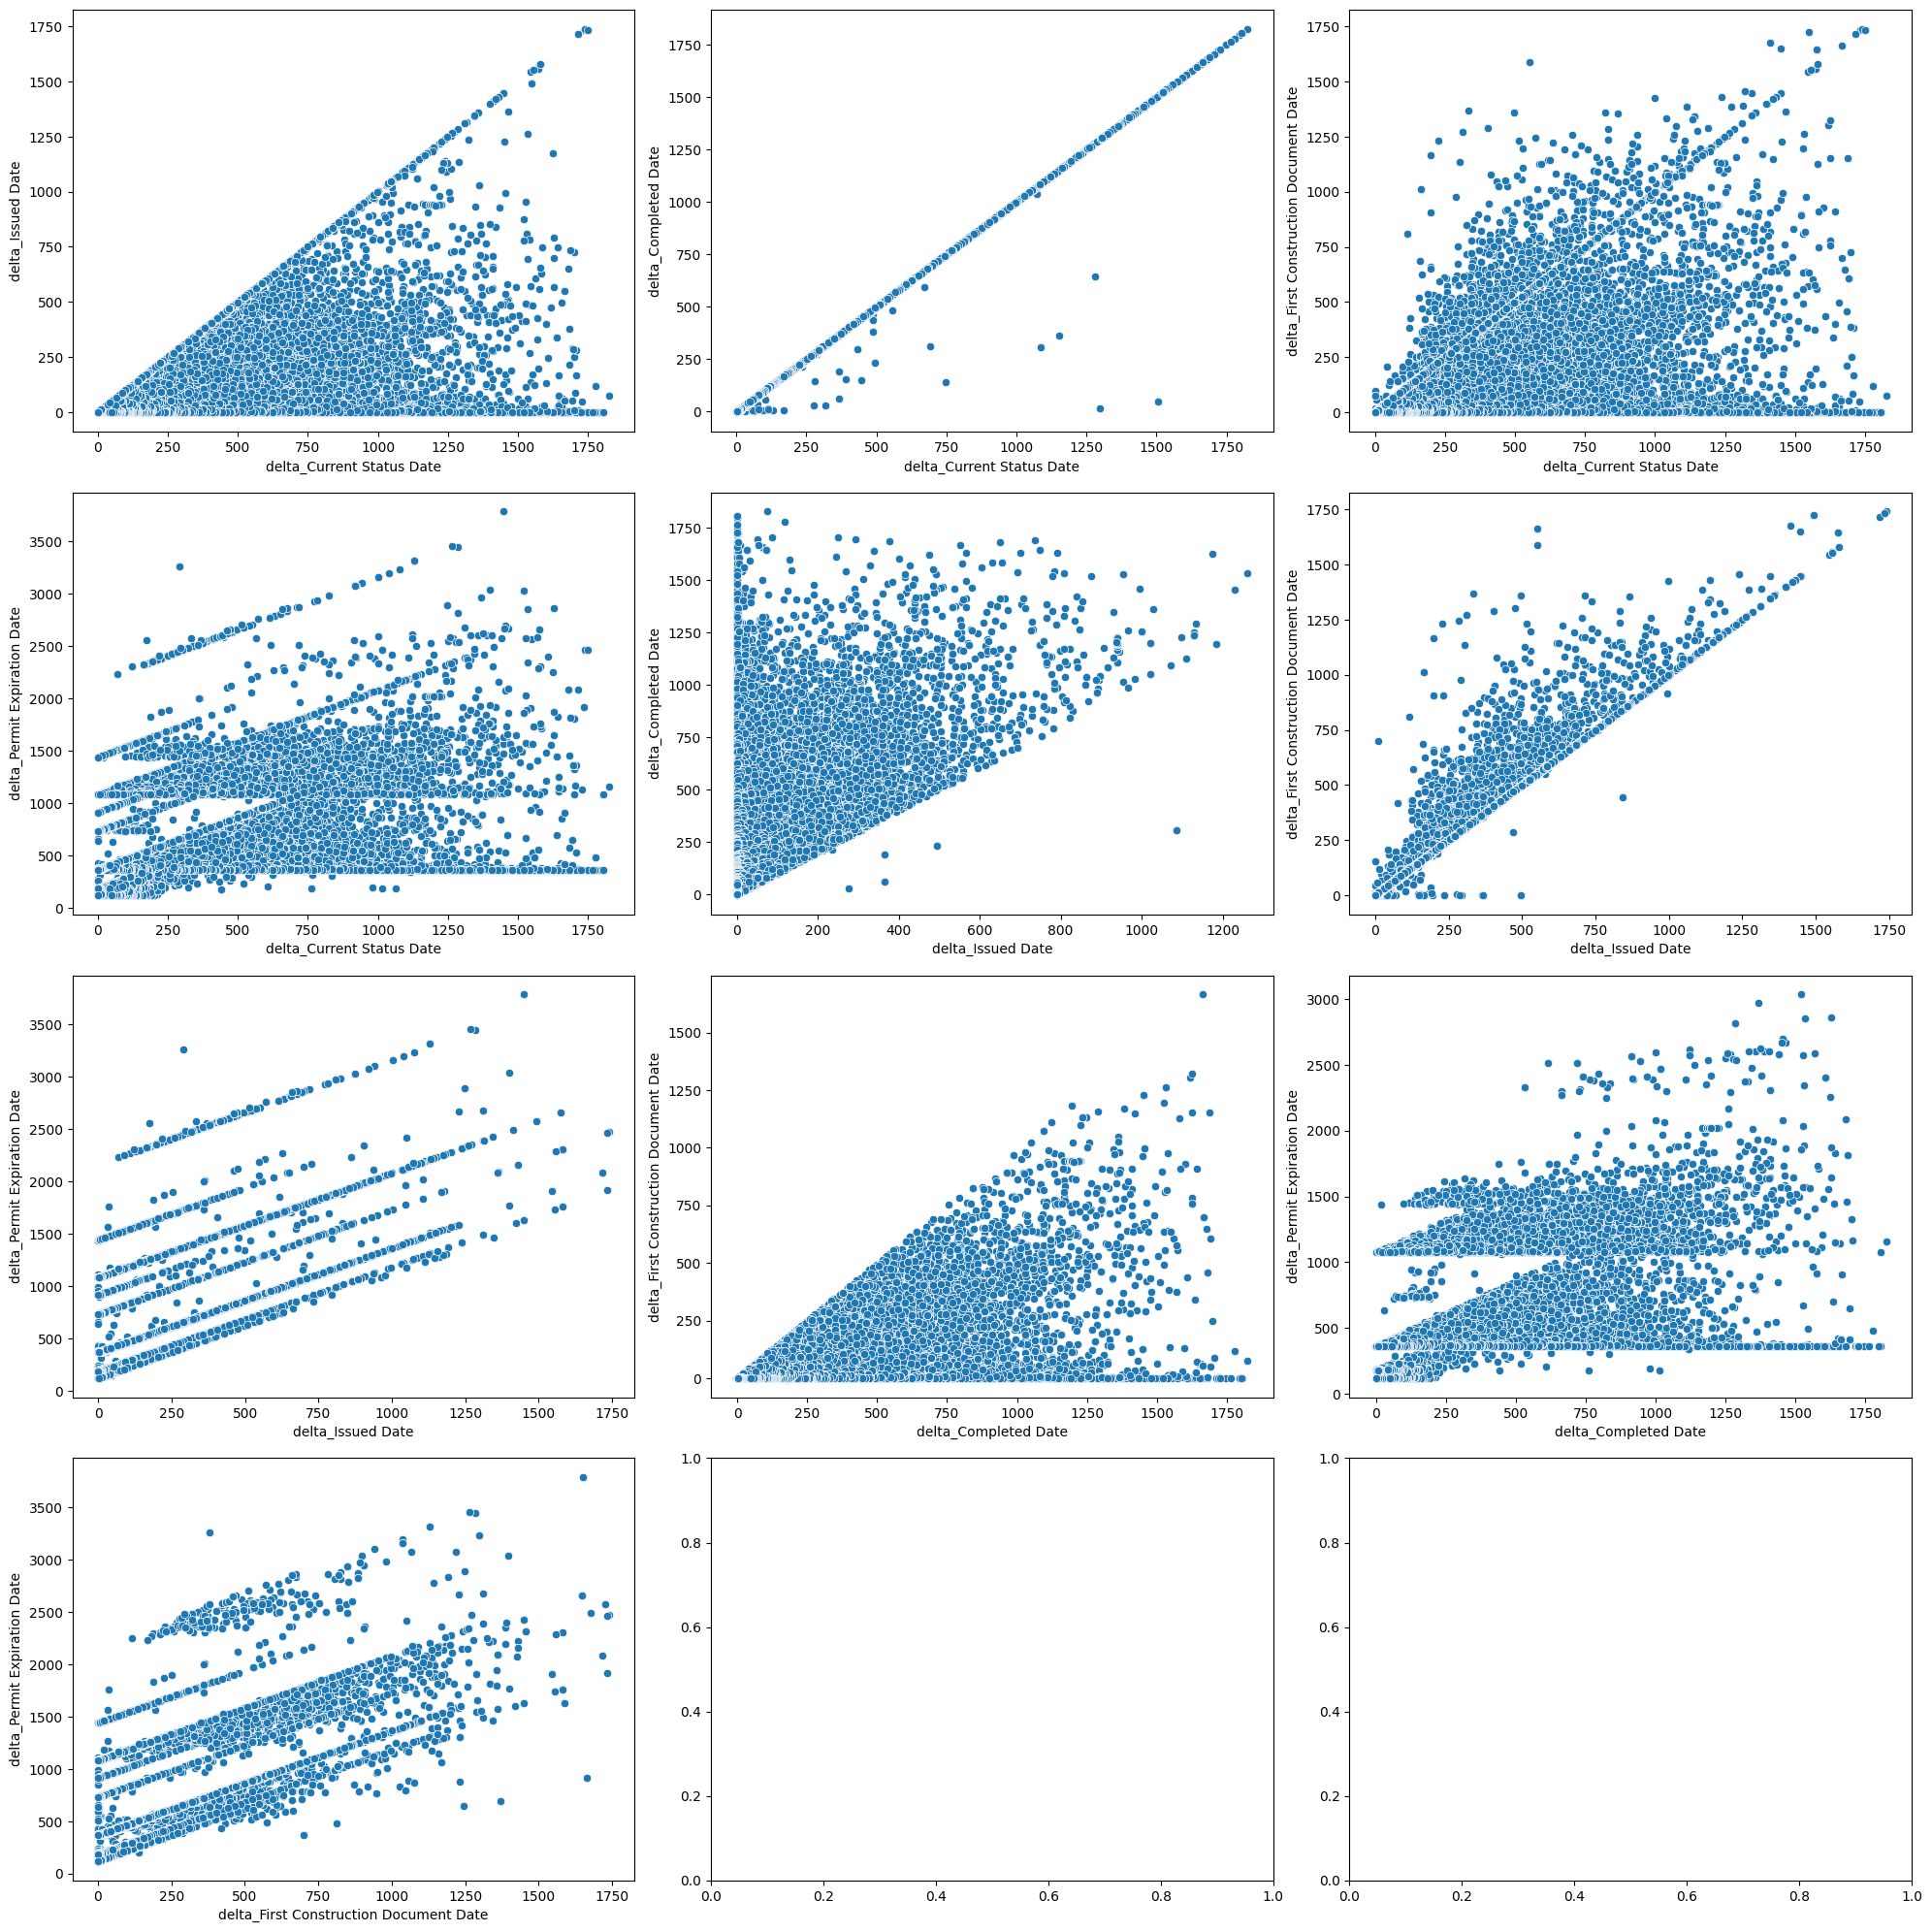

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(4, 3, figsize=(20, 20))
axes_flattened = axes.reshape(-1)

i = -1
for idx_1, col_name_1 in enumerate(delta_date_columns):
    for idx_2, col_name_2 in enumerate(delta_date_columns):
        if idx_2 <= idx_1:
            continue
        
        correlation = date_df[[col_name_1, col_name_2]].corr().iloc[0, 1]
        
        if correlation < 0.4:
            continue
        
        i += 1
        ax = axes_flattened[i]
        
        sns.scatterplot(
            x=col_name_1,
            y=col_name_2,
            data=date_df.dropna(subset=[col_name_1, col_name_2]),
            ax=ax,
        )  

fig.tight_layout(pad=1.0)
plt.show()

In [28]:
set(df['Current Status'])

{'appeal',
 'approved',
 'cancelled',
 'complete',
 'disapproved',
 'expired',
 'filed',
 'incomplete',
 'issued',
 'plancheck',
 'reinstated',
 'revoked',
 'suspend',
 'withdrawn'}

**Вывод:**

Признаки имеют достаточно сильную корреляцию. Необходимо как-то удалить или изменить признаки. `Current Status Date` и `Field Date` останутся без изменений. `First Construction Document Date` будет удален, так как сильно коррелирует с `Issued Date`, при этом процент NaN у них практически одинаков. Остальные аттрибуты будут заменены на новые аттрибуты с названиями `{attribut name} Complete` с булевыми типами. Таким образом можно будет понять, как заполнять пропуски. Если значение NaN, то этап еще не завершен и обозначаем его 0

### Unit

In [29]:
df = pd.read_csv(cfg["dataset_1"])

/tmp/ipykernel_92822/2154587262.py:1: DtypeWarning: Columns (22,32) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(cfg["dataset_1"])


In [30]:
unit_columns = ['Existing Units', 'Proposed Units', 'Unit Suffix', 'Unit']
unit_df = df[unit_columns]

/tmp/ipykernel_92822/78502903.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unit_df['Unit Suffix'] = unit_df['Unit Suffix'].replace(unit_suffix)


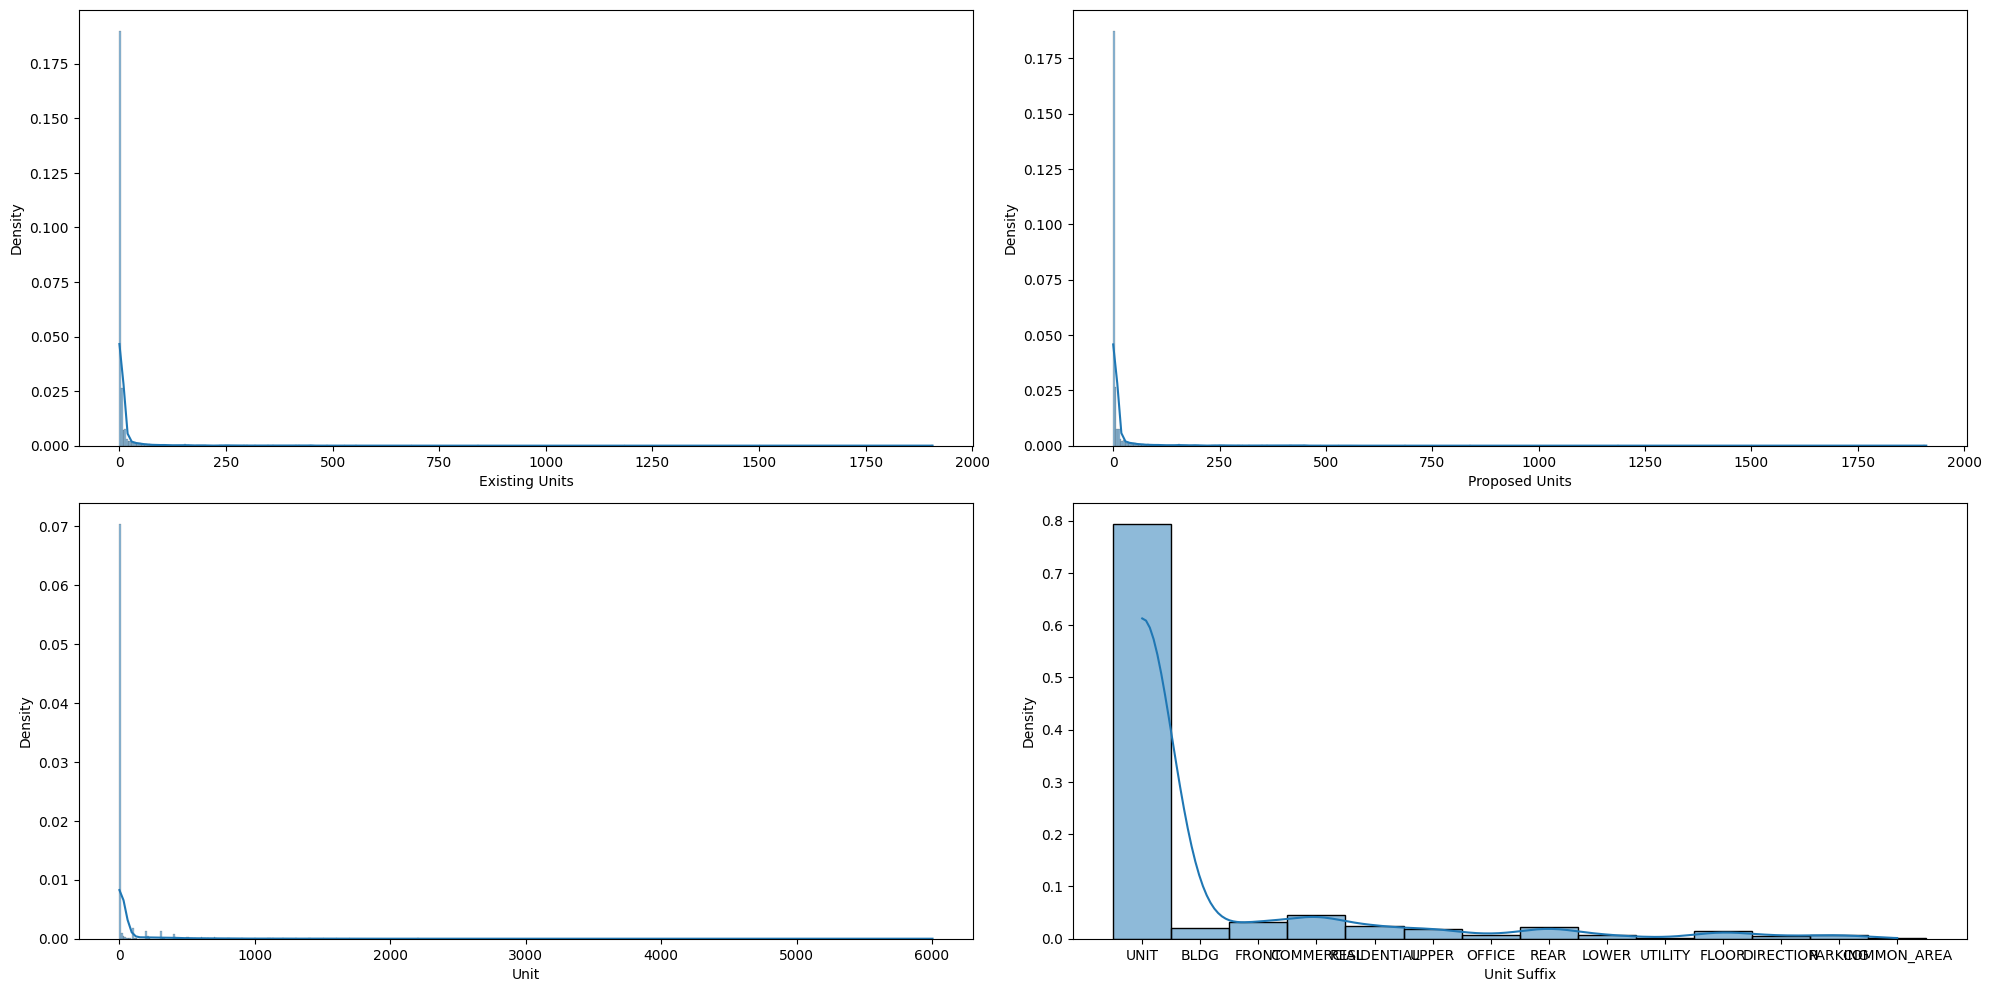

In [31]:
unit_df_num_columns = unit_df.select_dtypes(include=['float64']).columns

fig, axes = plt.subplots(2, 2, figsize=(20, 10))
axes_flattened = axes.reshape(-1)

bins = 500

for idx, column in enumerate(unit_df_num_columns):
    ax = axes_flattened[idx]
    sns.histplot(data=unit_df.dropna(subset=column),
                 x=column,
                 bins=bins,
                 stat='density',
                 kde=True,
                 ax=ax)
    
ax = axes_flattened[3]

unit_suffix = None
with open('Unit-Suffix.json', 'r') as json_file: # объеденили суффикы для уменьшения вариантов
    unit_suffix = json.load(json_file)
    
unit_df['Unit Suffix'] = unit_df['Unit Suffix'].replace(unit_suffix)
sns.histplot(data=unit_df, x='Unit Suffix',kde=True, stat='density', ax=ax)
    
fig.tight_layout(pad=1.0)

In [32]:
df[unit_df_num_columns].corr()

,Existing Units,Proposed Units,Unit
Existing Units,1.000000,0.994071,0.222569
Proposed Units,0.994071,1.000000,0.227423
Unit,0.222569,0.227423,1.000000


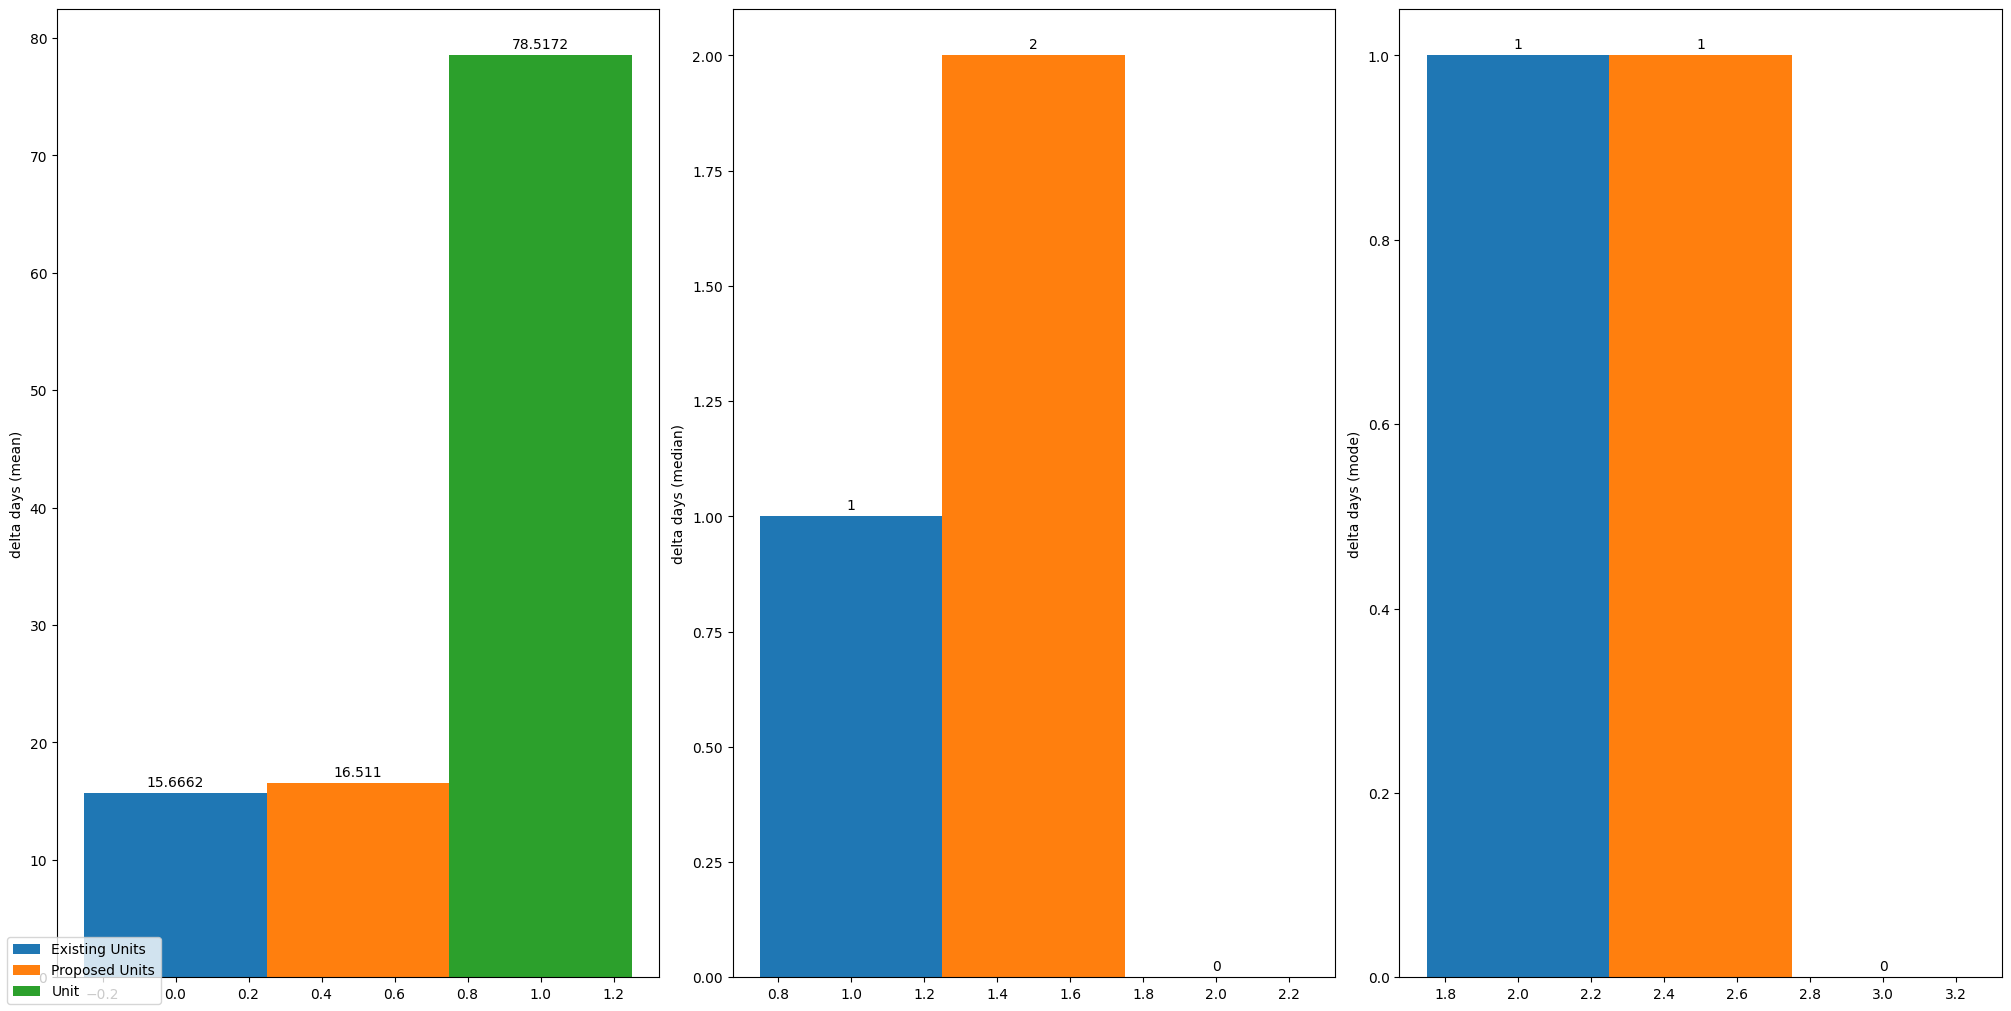

In [33]:
value_types = ("mean", "median", "mode")
value_times = dict.fromkeys(unit_df_num_columns, None)
for attribute in unit_df_num_columns:
    value_times[attribute] = (unit_df[attribute].mean(),
                              unit_df[attribute].median(),
                              unit_df[attribute].mode()
                              )

x = np.arange(len(value_types))
width = 0.5
multiplier = 0
fig, ax = plt.subplots(ncols=3, layout='constrained', figsize=(20, 10))
for attribute, measurement in value_times.items():
    offset = width * multiplier
    
    for idx, value_type in enumerate(value_types):
        value = measurement[idx] 
    
        rects = ax[idx].bar(x[idx] + offset, value, width)
        ax[idx].bar_label(rects, padding=3)

    multiplier += 1
for idx, value_type in enumerate(value_types): 
    ax[idx].set_ylabel(f"delta days ({value_type})")
    
fig.legend(unit_df_num_columns, loc='lower left')
plt.show()

In [34]:
set(unit_df[unit_df['Unit'] == 0]['Existing Units'].values)

{np.float64(0.0),
 np.float64(1.0),
 np.float64(2.0),
 np.float64(3.0),
 np.float64(4.0),
 np.float64(5.0),
 np.float64(6.0),
 np.float64(7.0),
 np.float64(8.0),
 np.float64(9.0),
 np.float64(10.0),
 np.float64(11.0),
 np.float64(12.0),
 np.float64(13.0),
 np.float64(14.0),
 np.float64(15.0),
 np.float64(16.0),
 np.float64(17.0),
 np.float64(18.0),
 np.float64(19.0),
 np.float64(20.0),
 np.float64(21.0),
 np.float64(22.0),
 np.float64(23.0),
 np.float64(24.0),
 np.float64(25.0),
 np.float64(26.0),
 np.float64(27.0),
 np.float64(28.0),
 np.float64(29.0),
 np.float64(30.0),
 np.float64(31.0),
 np.float64(32.0),
 np.float64(33.0),
 np.float64(34.0),
 np.float64(35.0),
 np.float64(36.0),
 np.float64(37.0),
 np.float64(38.0),
 np.float64(39.0),
 np.float64(40.0),
 np.float64(41.0),
 np.float64(42.0),
 np.float64(43.0),
 np.float64(44.0),
 np.float64(45.0),
 np.float64(46.0),
 np.float64(47.0),
 np.float64(48.0),
 np.float64(49.0),
 np.float64(50.0),
 np.float64(51.0),
 np.float64(52.0),
 np

In [35]:
unit_df['delta'] = unit_df['Existing Units'] - unit_df['Proposed Units']

/tmp/ipykernel_92822/1587956913.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unit_df['delta'] = unit_df['Existing Units'] - unit_df['Proposed Units']


In [36]:
unit_df[['delta', 'Existing Units', 'Proposed Units']].corr()

,delta,Existing Units,Proposed Units
delta,1.000000,0.005638,-0.103125
Existing Units,0.005638,1.000000,0.994071
Proposed Units,-0.103125,0.994071,1.000000


**Выводы:**
 1. Из графика 4 видно, что в основном суффикс принимает одно и то же значение => лучше его заменить на просто параметр `Has Suffix`
 2. В параметре Unit лучше заменить пропущенные значения нулями. Это соответствует медиане и моде. К тому же это можно интерпретировать как отсутствие сейчас Unit
 3. Existing и Proposed имеют сильную корреляцию. Можно один из них заменить на разность между `Existing Units` и `Proposed Units`

### Existing & Proposed

In [37]:
df = pd.read_csv(cfg["dataset_1"])

/tmp/ipykernel_92822/2154587262.py:1: DtypeWarning: Columns (22,32) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(cfg["dataset_1"])


In [38]:
columns = ['Existing Use', 'Existing Units', 'Existing Construction Type', 'Existing Construction Type Description',  'Number of Existing Stories',
          'Proposed Use', 'Proposed Units', 'Proposed Construction Type', 'Proposed Construction Type Description',  'Number of Proposed Stories'  ]

In [39]:
use_df = df[columns]

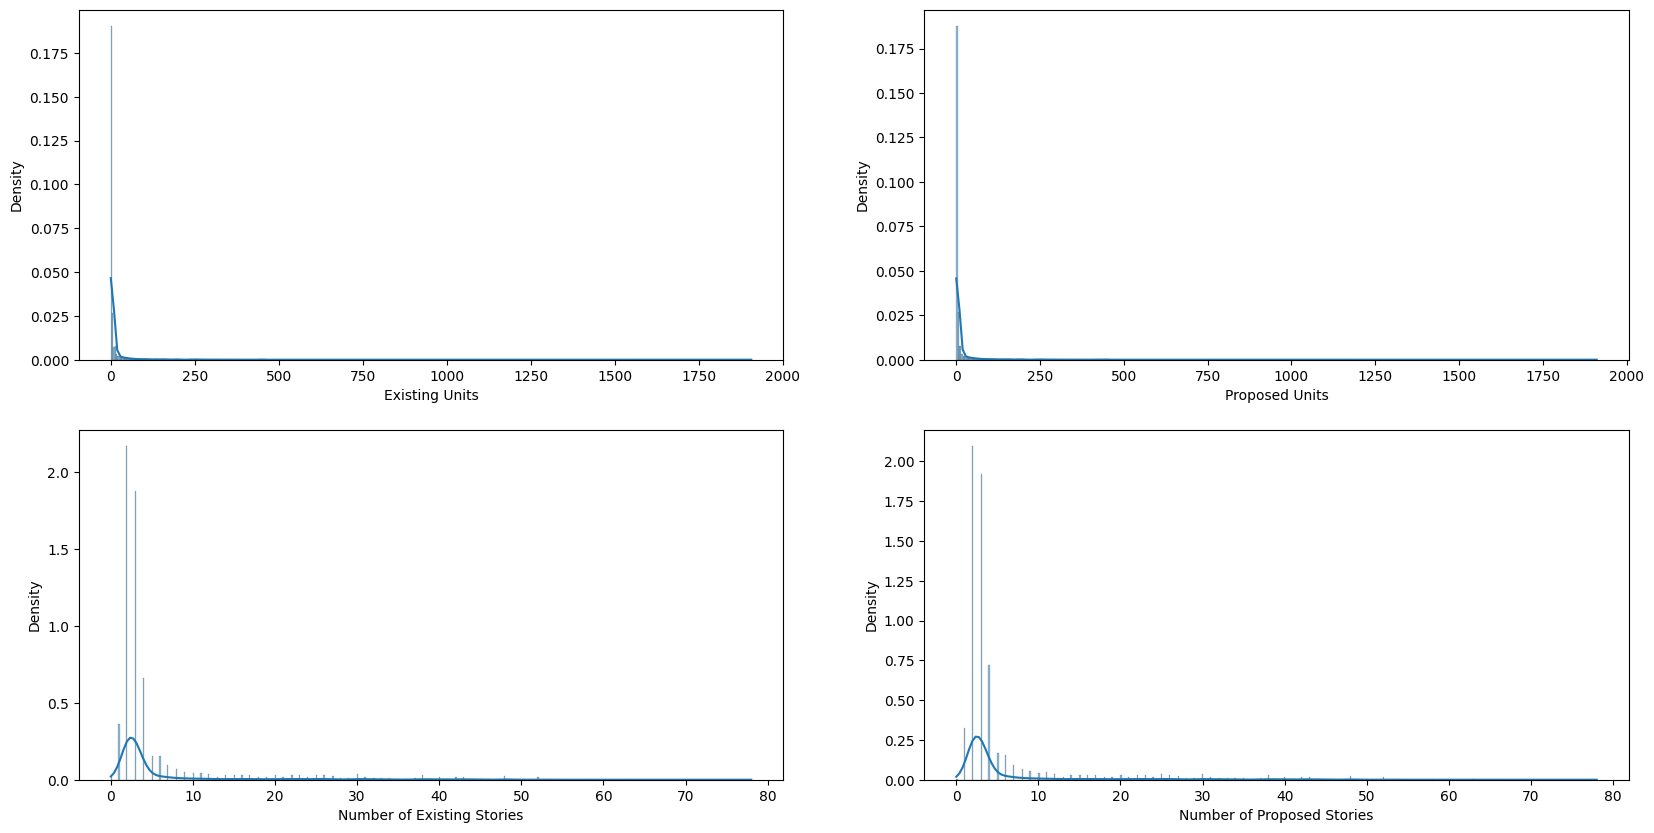

In [40]:
num_columns = ['Existing Units', 'Proposed Units', 'Number of Existing Stories', 'Number of Proposed Stories']

fig, axes = plt.subplots(2, 2, figsize=(20, 10))
axes_flattened = axes.reshape(-1)

bins = 500

for idx, column in enumerate(num_columns):
    ax = axes_flattened[idx]
    sns.histplot(data=use_df.dropna(subset=column),
                 x=column,
                 bins=bins,
                 stat='density',
                 kde=True,
                 ax=ax)

<Axes: >

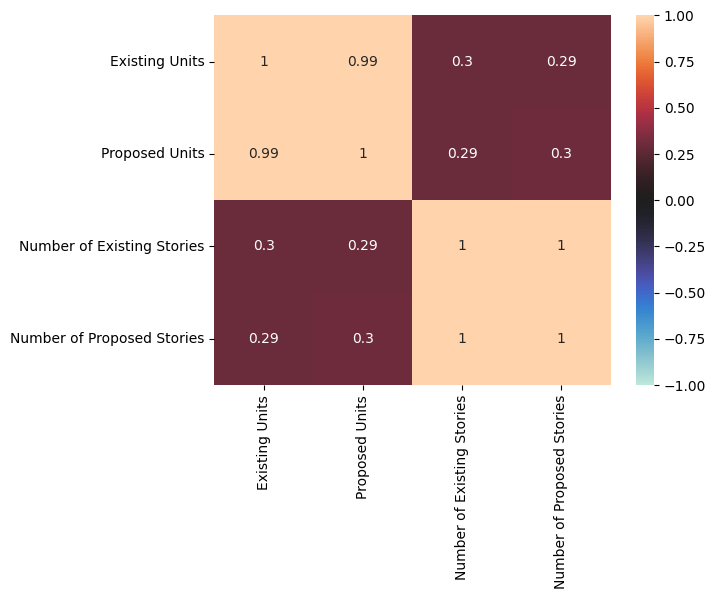

In [41]:
sns.heatmap(use_df[num_columns].corr(), annot = True, vmin=-1, vmax=1, center=0)

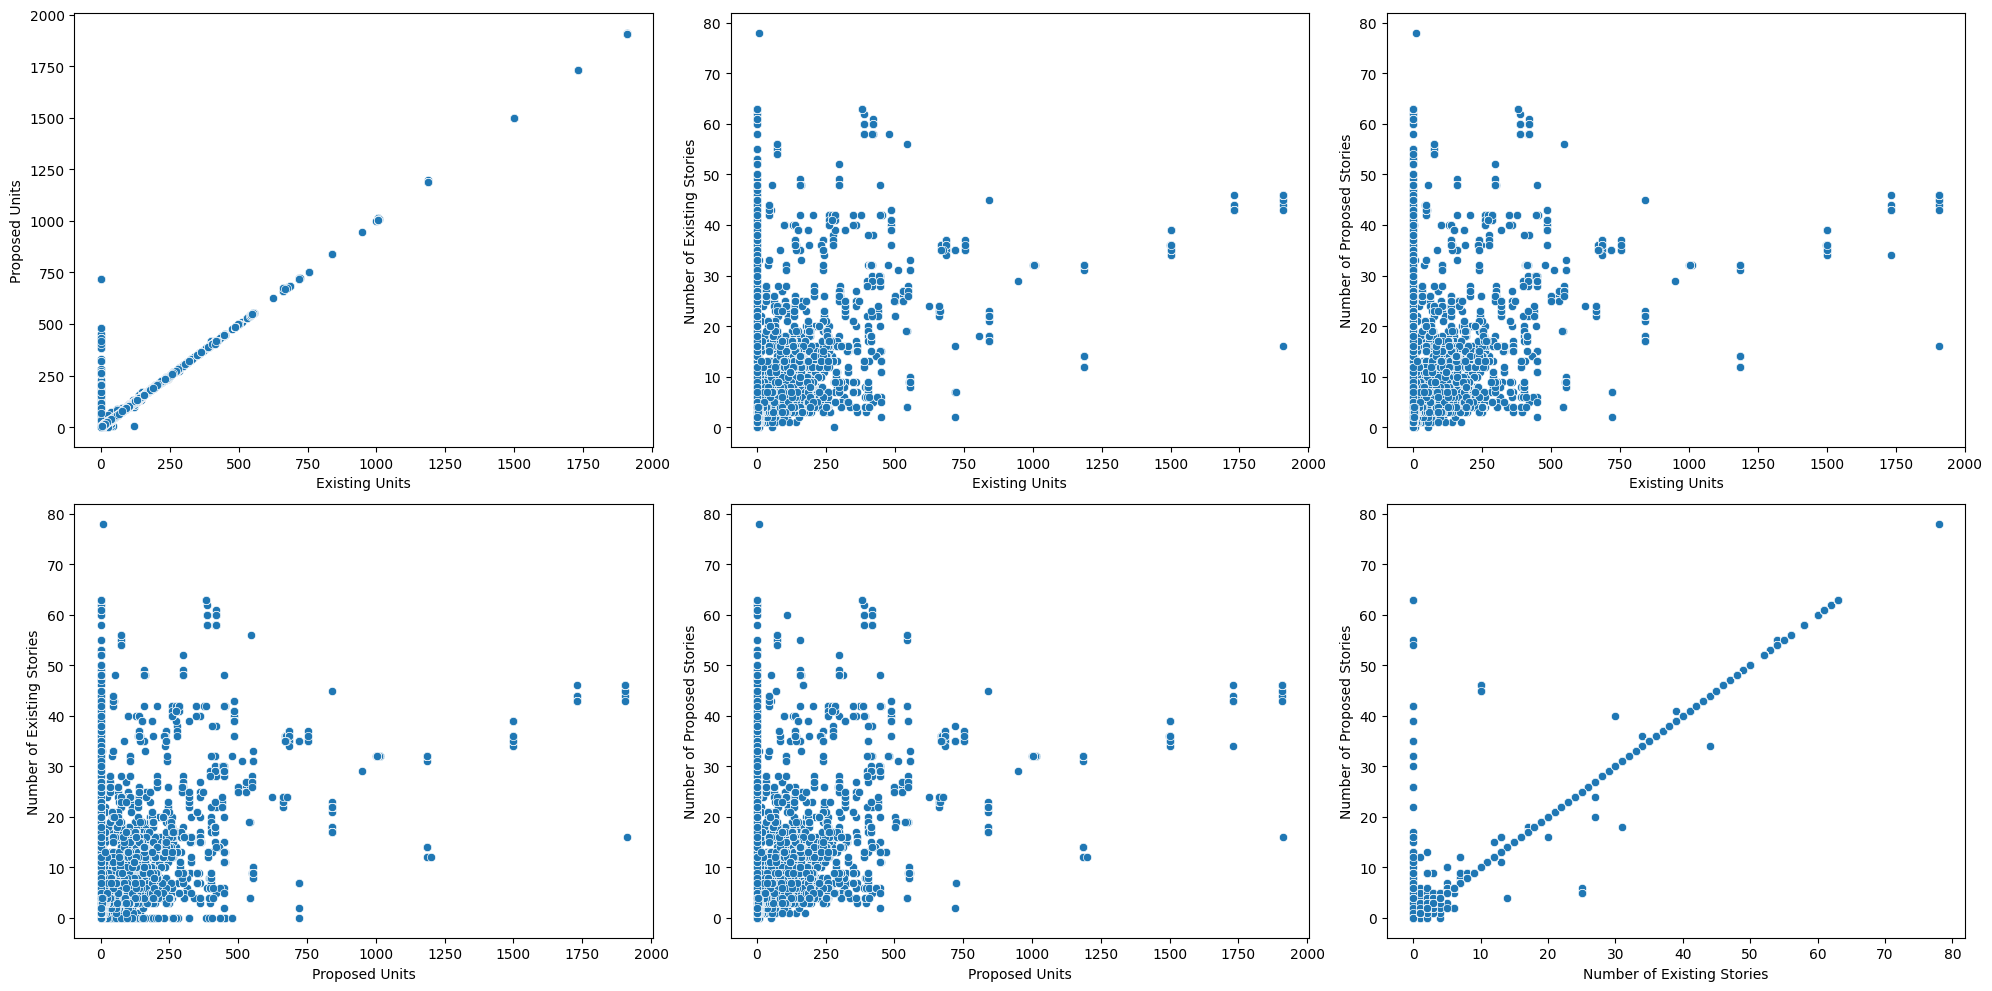

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 3, figsize=(20, 10))
axes_flattened = axes.reshape(-1)

i = -1
for idx_1, col_name_1 in enumerate(num_columns):
    for idx_2, col_name_2 in enumerate(num_columns):
        if idx_2 <= idx_1:
            continue
        
        correlation = use_df[[col_name_1, col_name_2]].corr().iloc[0, 1]
        
        i += 1
        ax = axes_flattened[i]
        
        sns.scatterplot(
            x=col_name_1,
            y=col_name_2,
            data=use_df.dropna(subset=[col_name_1, col_name_2]),
            ax=ax,
        )  

fig.tight_layout(pad=1.0)
plt.show()

In [43]:
from sklearn.preprocessing import OrdinalEncoder
existing_columns = ['Existing Use', 'Existing Construction Type Description']
proposed_columns = ['Proposed Use', 'Proposed Construction Type Description']
used_df = use_df.dropna()

encoder = OrdinalEncoder()
use_df[proposed_columns] = encoder.fit_transform(np.array(use_df[proposed_columns]))
use_df[existing_columns] = encoder.transform(np.array(use_df[existing_columns]))

/tmp/ipykernel_92822/2791844923.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  use_df[proposed_columns] = encoder.fit_transform(np.array(use_df[proposed_columns]))
/tmp/ipykernel_92822/2791844923.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  use_df[existing_columns] = encoder.transform(np.array(use_df[existing_columns]))


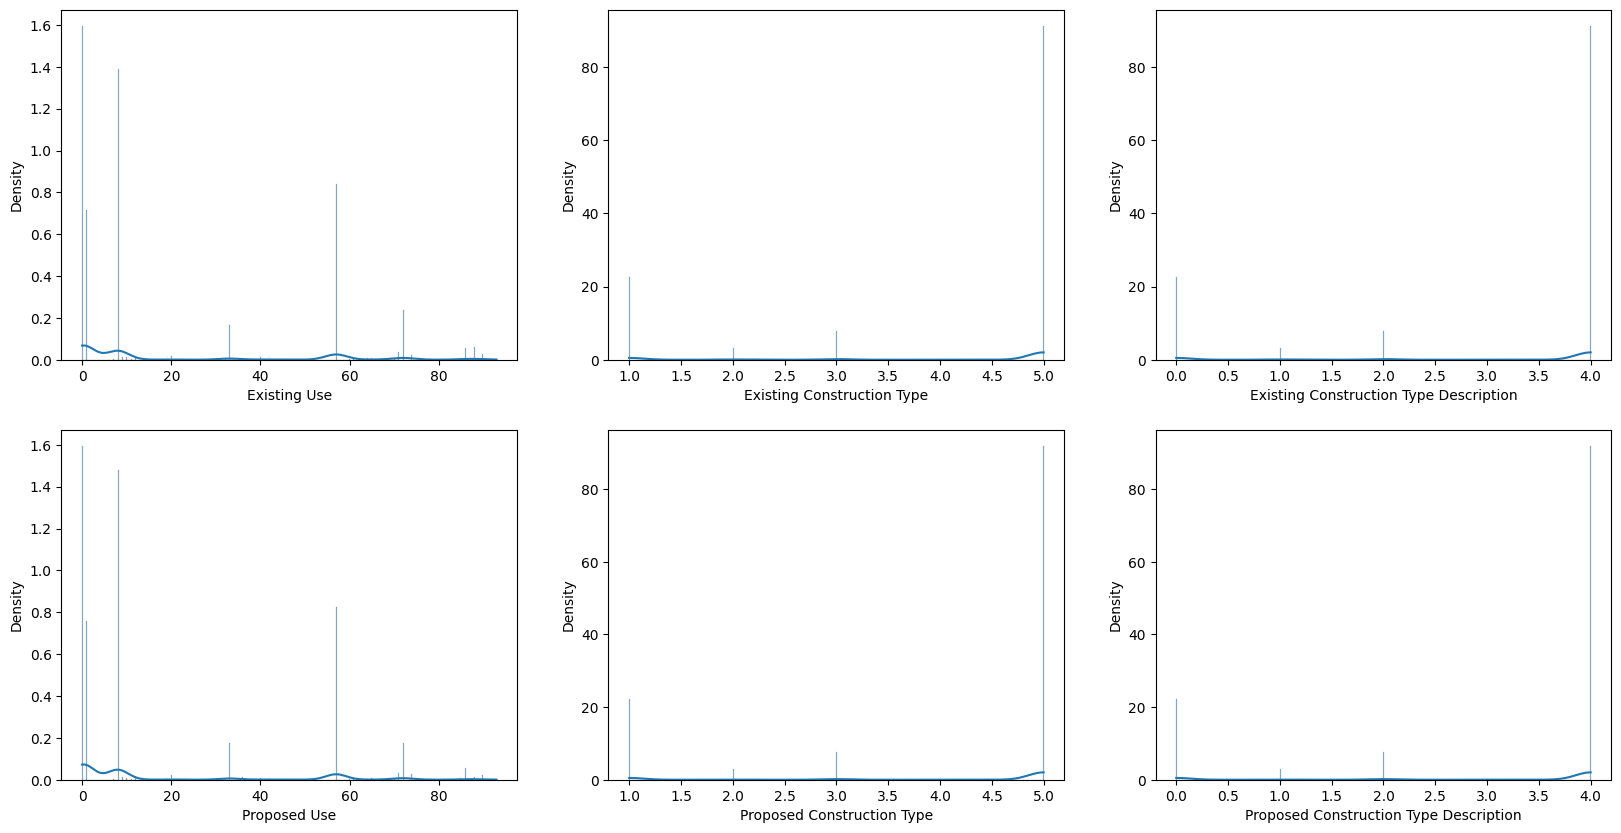

In [44]:
cat_columns = ['Existing Use', 'Existing Construction Type', 'Existing Construction Type Description',
               'Proposed Use', 'Proposed Construction Type', 'Proposed Construction Type Description']

fig, axes = plt.subplots(2, 3, figsize=(20, 10))
axes_flattened = axes.reshape(-1)

for idx, column in enumerate(cat_columns):
    ax = axes_flattened[idx]
    sns.histplot(data=use_df.dropna(subset=column),
                 x=column,
                 bins=bins,
                 stat='density',
                 kde=True,
                 ax=ax)

In [45]:
use_df['Same Use'] = (use_df['Existing Use'] == use_df['Proposed Use']).replace({"True": 1, "False": 0})
use_df['Same Construction Type Description'] = (use_df['Existing Construction Type Description'] == use_df['Proposed Construction Type Description']).replace({"True": 1, "False": 0})

/tmp/ipykernel_92822/1727314068.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  use_df['Same Use'] = (use_df['Existing Use'] == use_df['Proposed Use']).replace({"True": 1, "False": 0})
/tmp/ipykernel_92822/1727314068.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  use_df['Same Construction Type Description'] = (use_df['Existing Construction Type Description'] == use_df['Proposed Construction Type Description']).replace({"True": 1, "False": 0})


In [46]:
sum(use_df['Same Use']) / len(use_df) * 100, sum(use_df['Same Construction Type Description']) / len(use_df) * 100

(74.22976370035194, 76.35796882855706)

**Выводы:**
 1. `Existing Units` и `Proposed Units` имеют очень сильную корреляцию, поэтому один из них надо удалить. Аналогично с `Number of Existing Stories` и `Proposed of Existing Stories`.
 2. `Number of Existing Stories` зависит от `Existing Units` также, как и `Number of Proposed Stories` зависит от `Proposed Units`. Поэтому одну из этих пар можно удалить.
 3. `Existing Use` и `Proposed Use` имеют в целом одинаковые распределения. Поэтому один из них можно удалить. Однако, cамо знание изменения типа может быть крайне полезным, поэтому можно столбец `Proposed Use` удалить и добавить столбец `Same Use`. Аналогично `Existing Construction Type` и `Proposed Construction Type`, `Existing Construction Type Description` и `Proposed Construction Type Description`

### Разбиение признаков на категориальные и числовые признаки

In [49]:
df = pd.read_csv(cfg["dataset_1"])

/tmp/ipykernel_92822/2154587262.py:1: DtypeWarning: Columns (22,32) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(cfg["dataset_1"])


In [ ]:
num_columns = []
cat_columns = []

In [50]:
num_df = df.select_dtypes(include=['int64', 'float64'])
cat_df = df.select_dtypes(include=['object'])

### Работа с числовыми признаками

### Работа с категориальными данными